In [2]:
# Autenticación para repos privados
from google.colab import auth
auth.authenticate_user()

# Clonar un repo público
!git clone https://github.com/clopezquesada/tfm_zonas_ser.git

Cloning into 'tfm_zonas_ser'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 3.09 MiB | 5.94 MiB/s, done.
Resolving deltas: 100% (2/2), done.


# TFM - Análisis de las zonas SER de Madrid

## MEMORIA

# 1. Introducción
Encontrar aparcamiento supone un reto para la mayoría de conductores, este problema se intensifica aún más en grandes núcleos urbanos como Madrid. De hecho, el artículo ... indica que el 76% de los españoles estima que la falta de aparcamiento es el principal problema de movilidad urbana que tienen en su ciudad, además, en éste se destaca que Madrid es una de las ciudades en las que este problema se hace más notable. La dificultad en el aparcamiento se ve aún más intensificada en las zonas céntricas de la capital debido al gran volumen de vehículos y el tráfico constante. Éste hecho no solo conlleva una pérdida de tiempo notable para los usuarios si no también un gasto considerable de combustible y, por ende, una mayor contaminación.

En la actualidad, uno de los principales retos es empujar a las ciudades hacia un modelo más sostenible e inteligente, las conocidas como smart cities, así un aparcamiento gestionado de manera eficiente es un reto clave para reducir el impacto medioambiental y para ayudar a la fluidez de la movilidad urbana. Así, este trabajo nace del interés por aplicar la ciencia de datos a un problema que está a la orden del día con gran impacto social y medioambiental. En particular, se pretende resaltar la creciente disponibilidad de datos a tiempo real, que junto con datos históricos y tecnologías en big data y machine learning permiten abordar problemas urbanos desde una perspectiva innovadora, tal y como se ha estudiado a lo largo del máster. Además, el trabajo tiene en el fondo una naturaleza de segmentación de perfiles que se podría extrapolar a otros escenarios como la agrupación de usuarios en plataformas de venta digitales, aportando así valor a las empresas en la toma de decisiones basadas en datos.

*Mirar este párrafo que está fatal*El trabajo se centra en desarrollar una herramienta que utilizando datos a tiempo real, además del conocimiento aportado por datos históricos, lleve a cabo una segmentación de las distintas zonas Servicio de Estacionamiento Regulado del centro de Madrid según la facilidad de encontrar aparcamiento en ellas. Para ello, se utilizarán datos abiertos del Ayuntamiento de Madrid sobre tráfico, parquímetros y zonas SER. A lo largo del trabajo se aplican técnicas de análisis descriptivo, aprendizaje estadístico supervisado y no supervisado y análisis predictivo. Además se desarrollará una aplicación web interactiva que permitirá visualizar estos resultados en mapas, buscando así una interpretación rápida, fácil y visual. Además se han considerados diversos artículos relacionados con el aparcamiento inteligente como por ejemplo, … y … que sirven de fundamento para el. El trabajo se estructura en varios capítulos, en primer lugar, se presenta el problema, a continuación, se describe la recopilación y procesamiento de los datos, seguidos por la metodología utilizada para el análisis y el desarrollo del modelo, después, se presentan los resultados obtenidos y la aplicación web desarrollada. Finalmente, se exponen las conclusiones, limitaciones y posibles líneas futuras de trabajo.

# 2. Descripción de las fuentes y análisis inicial
*Hacer referencia al apartado de carga y análisis del anexo*
La totalidad de los datos usados en el trabajo han sido extraidos del Portal de Datos Abiertos del Ayuntamiento de Madrid.
Por un lado, introducimos los archivos considerados relativos a la información sobre las zonas de Servicio de Estacionamiento Regulado. En primer lugar, se ha considerado el archivo calles-SER-2025.csv, el cual tiene 33731 filas y 12 columnas, cada una de estas filas se corresponde a información de una zona SER determinada. \textbf{Poner head del df}. Después se considera el archivo parquimetros.csv el cual contiene 6126 filas y 14 columnas de información sobre parquímetros. \textbf{Poner head del df}. Se utiliza el archivo Primertrimestre2025.csv, el cual contiene 12745646 y 12 columnas, el cual nos indica la duración e importe de cada uno de los tickets sacados en diversos parquímetros para el primer trimestre de 2025 (coger también los del segundo trimestre hasta mayo???) .\textbf{poner cabecera df}. La granularidad de este conjunto de datos es parquímetro, día fecha y hora, pero para tener una visión más general de estos datos nos quedamos únicamente con el importe medio, la duración media en minutos, y el número de tickets registrados para cada parquímetro en cada franja de tiempo: mañana, mediodia, tarde y noche, y distinguimos entre si se trata de fin de semana o de un día entre semana. De esta manera acabamos un dataframe llamado zonas-ser-sin-info que recoge las zonas ser sobre las que no tenemos información y por otro lado, zonas-ser-info.
Por otro lado, se introducen los archivos relativos al tráfico histórico de Madrid, para ello se consideran los archivos 01-2025.csv, 02-2025.csv,... relativos al tráfico medido cada ... minutos en distintos puntos de medida de Madrid centro. Al unir todos esos datos contamos con un total de 18726997 filas y 9 columnas. Los puntos de medida del tráfico los tenemos en el archivo pmed-ubicacion-06-2025.csv. De nuevo, para tener una visualización más simplificada de los datos consideramos la media de intensidad, media de ocupación y media de carga para cada punto de medida, según la franja de tiempo y si es fin de semana o un día entre semana, el resultado es el df trafico-historico. El procesamiento inicial de estos archivos se ha llevado a cabo en pspark para el tratamiento de los grandes volúmenes de datos de manera efectiva.
Los datos de tráfico a tiempo real se obtienen mediante un flujo dinámico en formato XML los cuales se actualizan cada 15 minutos en la url y siguen el siguiente esquema:.. De aquí obtenemos el df trafico-actual.\textbf{Quizás estaría bien mirar la distribución de los datos para cada franja para ver si está bien hecho lo de coger la media, esto va a alargar mucho todo pero así es más completo, quizás interesa más coger la mediana.}

# 3. Metodología
## Modelo de regresión

## Modelo de clustering

Tras el modelo de regresión en el que se han estimado las variables ... y ... para el conjunto de datos que no las tenían. Montamos el modelo de clustering mediante el que se pretende estimar la segmentación de las zonas centro de la capital según distintos factores como: .... Así, se ha estudiado dicha segmentación para cada int_tiempo y para fin_de_semana, la cual se ha llevado a cabo mediante K-means, antes se ha llevado a cabo una reducción de la dimensionalidad, esto también se estudia detalladamente para cada subconjunto, y se determina que 4 componentes principales explican más del 90% de la varianza en cada uno de los subconjuntos. Para el algoritmo de clustering los resultados utilizados, que se pueden visualizar más detalladamente en la sección de Código en el anexo, son los siguiente:



## CÓDIGO

### Lectura y análisis de las fuentes. Tratamiento inicial de los datos.

Para comenzar, debido a la naturaleza variada y dispersa de los datos que se van a utilizar llevamos a cabo un pretratamiento de éstos. A lo largo de ésta sección se harán modificaciones de los conjuntos de datos a partir de pandas, Spark y geopandas para llegar a los dataframes con los que trabajaremos finalmente. Ésta se cumplimentará con un análisis exploratorio de algunos de los conjuntos de datos que por el tratamiento que se va a realizar, no se puede analizar más adelante. Explicar de manera adecuada y ligera de leer el procedimiento que se lleva a cabo en esta sección. Falta estudiar valores nulos o missing data y duplicados. Poner id a cada zona ser para identificación única que sea cod_barrio, calle, numero_finca

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

En primer lugar, se ha considerado el archivo calles-SER-2025.csv, el cual tiene 33731 filas y 10 columnas, cada una de estas filas se corresponde a información de una zona SER determinada, la información sobre éste se puede consultar en ... . Procedemos a su carga y análisis, trabajamos inicialmente con pyspark y con pandas según sea necesario.

In [ ]:
calles_ser = pd.read_csv('calles_SER_2025.csv', encoding = 'latin-1', sep = ';')

In [ ]:
calles_ser.head(5)

In [ ]:
calles_ser.info()

Todo esto después, o al menos en este caso sí que se puede mantener pero quizás mejor después. Descripción general de las variables del df:


*   Variables numéricas
      - numero_plazas
*   Variables categóricas
      - Consideramos únicamente distrito, barrio, color, bateria_linea



In [ ]:
calles_ser['id'] = (calles_ser['cod_barrio'].astype(str) + "_" +
                    calles_ser['cod_distrito'].astype(str) + "_" +
                    calles_ser['numero_finca'].astype(str))

In [ ]:
duplicados = calles_ser[calles_ser.duplicated(keep=False)]
duplicados

In [ ]:
calles_ser.drop_duplicates(inplace=True)

In [ ]:
calles_ser['color'] = calles_ser['color'].replace({
    '077214010 Verde': 'Verde',
    '043000255 Azul': 'Azul',
    '081209246 Alta Rotación': 'Alta Rotación',
    '255140000 Naranja': 'Naranja',
    '255000000 Rojo': 'Rojo'
})


Vemos que la distribución del número de plazas es muy asimétrica, además de presentar una gran cantidad de outliers, lo cual es esperable en datos reales, que la mayoría de aparcamientos tengan entre 1 y 15 plazas, pero que haya muchos aparcamientos que puedan tener más. Estudiamos a continuación las variables categóricas.

Interpretación de las variables categóricas. De este dataframe nos interesa conocer la latitud y la longitud de cada zona SER, su color, si se trata de un aparcamiento en línea o en batería y el número de plazas que tiene. Mostrar visualización con el número de zona SER en cada barrio y poner etiqueta de color y símbolo dependiendo de si se trata de un aparcamiento en línea o en batería. Hacer el símbolo más grande conforme más numero_plazas tenga. El sistema de georreferenciación utilizado en los datos de coordenadas es ETRS89.

In [ ]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:25830", "EPSG:4326", always_xy=True)

calles_ser['longitud'], calles_ser['latitud'] = transformer.transform(calles_ser['gis_x'].values, calles_ser['gis_y'].values)

In [ ]:
calles_ser.to_csv("calles_ser_df.csv", index=False)

In [ ]:
calles_ser = pd.read_csv('calles_ser_df.csv')

In [ ]:
parquimetros = pd.read_csv('parquimetros.csv', encoding = 'latin-1', sep = ';')

In [ ]:
duplicados = parquimetros[parquimetros.duplicated(keep=False)]
duplicados

In [ ]:
parquimetros.drop_duplicates(inplace = True)

In [ ]:
parquimetros.head(5)

Quitamos los parquímetros que están dados de baja, vamos a interesarnos únicamente por los que están activos.

In [ ]:
parquimetros['matricula'] = parquimetros['matricula'].astype('Int64')
parquimetros['matricula'] = parquimetros['matricula'].astype(str)

In [ ]:
parquimetros = parquimetros[parquimetros['fecha_de_baja'].isna()]

In [ ]:
parquimetros = parquimetros.drop(columns = ['fecha_de_baja'])

In [ ]:
parquimetros.info()

In [ ]:
parquimetros.head()

In [ ]:
parquimetros['barrio'].value_counts()

In [ ]:
calles_ser_parquimetro = pd.merge(parquimetros[['matricula','cod_distrito','cod_barrio','numero_finca','calle']],
                                  calles_ser[['bateria_linea','color','latitud','longitud','cod_distrito','cod_barrio','numero_finca','calle','numero_plazas']],
                                  on=['cod_distrito', 'cod_barrio', 'numero_finca','calle'],
                                  how = 'inner',
                                  )

In [ ]:
calles_ser_parquimetro

In [ ]:
# duplicados = calles_ser_parquimetro[calles_ser_parquimetro.duplicated(keep=False)]
# duplicados

In [ ]:
# calles_ser_parquimetro.drop_duplicates(inplace=True)

Leemos los archivos que contienen la información de los tiquets de los parquímetros, como son archivos de millones filas y muchas columnas usamos Spark para su lectura y posteriores transformaciones hasta obtener un df adecuado para tratar con pandas.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import dayofmonth, month, col, count
from pyspark.sql.functions import to_timestamp, date_format, when
from pyspark.sql.functions import avg, count
from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.types import FloatType

In [ ]:
spark = SparkSession.builder \
    .appName("TiquetsParking") \
    .getOrCreate()


tiquets_1trimestre = spark.read.csv("Primertrimestre2025.csv", header=True, inferSchema=True, sep=";")
# tiquets_2trimestre = spark.read.csv("Primertrimestre2025.csv", header=True, inferSchema=True, sep=";")

tiquets = tiquets_1trimestre

In [ ]:
tiquets.printSchema()

In [ ]:
tiquets.show(5)

In [ ]:
tiquets = tiquets.withColumn(
    "importe_tique",
    regexp_replace("importe_tique", ",", ".").cast(FloatType())
)

In [ ]:
tiquets = tiquets.withColumn("dia", date_format(col("fecha_operacion"), "dd-MM-yyyy")) \
                 .withColumn("hora", date_format(col("fecha_operacion"), "HH"))

tiquets = tiquets.withColumn("dia_semana", date_format(col("fecha_operacion"), "EEEE"))

tiquets = tiquets.withColumn(
    "dia_semana",
    when(col("dia_semana") == "Monday", 1)
    .when(col("dia_semana") == "Tuesday", 2)
    .when(col("dia_semana") == "Wednesday", 3)
    .when(col("dia_semana") == "Thursday", 4)
    .when(col("dia_semana") == "Friday", 5)
    .when(col("dia_semana") == "Saturday", 6)
    .when(col("dia_semana") == "Sunday", 7)
    .otherwise("Desconocido")
    )

tiquets = tiquets.withColumn("fin_de_semana", when(col("dia_semana").isin([6, 7]), 1).otherwise(0))

tiquets = tiquets.withColumn("hora",
    when(col("hora") == 0, 24).otherwise(col("hora"))
)

tiquets = tiquets.withColumn("int_tiempo", when((col("hora") >= 6) & (col("hora") < 12), "Mañana")
                  .when((col("hora") >= 12) & (col("hora") < 19), "Mediodia")
                  .when((col("hora") >= 19) & (col("hora") < 24), "Tarde")
                  .otherwise("Noche"))

In [ ]:
tiquets.select("matricula_parquimetro").distinct().count()

In [ ]:
tiquets_agrupado = tiquets.groupBy("matricula_parquimetro", "int_tiempo", "fin_de_semana").agg(
    avg("minutos_tique").alias("media_minutos"),
    avg("importe_tique").alias("media_importe"),
    count("*").alias("num_registros")
)

tiquets_agrupado.show(5)

In [ ]:
tiquets_agrupado.printSchema()

In [ ]:
tiquets_agrupado.count()

Volvemos a trabajar en pandas para unir la información relativa a los tiquets de cada parquímetros a la información de cada uno de ellos que teníamos anteriormente, para ello transformamos tiquets_agrupado a pandas.

In [ ]:
tiquets_df = tiquets_agrupado.toPandas()

tiquets_df.head(5)

In [ ]:
duplicados = tiquets_df[tiquets_df.duplicated(keep=False)]
duplicados

In [ ]:
tiquets_df.info()

In [ ]:
parquimetros.head()

In [ ]:
parkings_info = pd.merge(tiquets_df, parquimetros, left_on='matricula_parquimetro', right_on='matricula', how='inner')


No vamos a usar más ni la matrícula de los parquímetros ni el importe de los tiquets (nos da igual porque hay zonas verdes en los que no hay importe y estamos considerando aspectos generales de todas las zonas ser)

In [ ]:
parkings_info = parkings_info[['int_tiempo', 'fin_de_semana', 'media_minutos', 'num_registros', 'cod_distrito', 'cod_barrio', 'calle','numero_finca','longitud','latitud']]

In [ ]:
parkings_info.head()

Falta tráfico y el número de plazas

In [ ]:
parkings_info = pd.merge(parkings_info,
                         calles_ser[['cod_barrio','calle','numero_finca','numero_plazas','color','bateria_linea','gis_x','gis_y']],
                         on = ['cod_barrio','calle','numero_finca'],
                         how = 'inner')

In [ ]:
parkings_info.head()

In [ ]:
parkings_info.info()

In [ ]:
duplicados = parkings_info[parkings_info.duplicated(keep=False)]
duplicados

Vamos a leer únicamente datos de tráfico de enero a marzo del 2025, los correspondientes al primer trimestre para así tener consistencia con los datos de tiquets, que el archivo para datos más actuales está dañado

In [ ]:
datos_enero = spark.read.csv("01-2025.csv", header=True, inferSchema=True, sep=";")
datos_febrero = spark.read.csv("02-2025.csv", header=True, inferSchema=True, sep=";")
datos_marzo = spark.read.csv("03-2025.csv", header=True, inferSchema=True, sep=";")

trafico = datos_enero.unionByName(datos_febrero).unionByName(datos_marzo)

In [ ]:
trafico.show(5)
trafico.printSchema()

In [ ]:
trafico.count()

In [ ]:
trafico = trafico.withColumn("dia", date_format(col("fecha"), "dd-MM-yyyy")) \
                 .withColumn("hora", date_format(col("fecha"), "HH"))

trafico = trafico.withColumn("dia_semana", date_format(col("fecha"), "EEEE"))

trafico = trafico.withColumn(
    "dia_semana",
    when(col("dia_semana") == "Monday", 1)
    .when(col("dia_semana") == "Tuesday", 2)
    .when(col("dia_semana") == "Wednesday", 3)
    .when(col("dia_semana") == "Thursday", 4)
    .when(col("dia_semana") == "Friday", 5)
    .when(col("dia_semana") == "Saturday", 6)
    .when(col("dia_semana") == "Sunday", 7)
    .otherwise("Desconocido")
    )

trafico = trafico.withColumn("fin_de_semana", when(col("dia_semana").isin([6, 7]), 1).otherwise(0))

trafico = trafico.withColumn("hora",
    when(col("hora") == 0, 24).otherwise(col("hora"))
)

trafico = trafico.withColumn("int_tiempo", when((col("hora") >= 6) & (col("hora") < 12), "Mañana")
                  .when((col("hora") >= 12) & (col("hora") < 19), "Mediodia")
                  .when((col("hora") >= 19) & (col("hora") < 24), "Tarde")
                  .otherwise("Noche"))

In [ ]:
trafico.show(5)

In [ ]:
from pyspark.sql.functions import avg

trafico_agrupado = trafico.groupBy("int_tiempo","fin_de_semana","id").agg(
    avg("intensidad").alias("media_intensidad"),
    avg("ocupacion").alias("media_ocupacion"),
    avg("carga").alias("media_carga")
)

In [ ]:
trafico_agrupado.count()

In [ ]:
trafico_agrupado.show(5)

In [ ]:
trafico_df = trafico_agrupado.toPandas()

In [ ]:
trafico_df['id'] = trafico_df['id'].astype(str)

In [ ]:
import pandas as pd
ubicacion_pmed = pd.read_csv("pmed_ubicacion_06-2025.csv",  encoding = 'latin-1', sep = ';')

In [ ]:
ubicacion_pmed.info()

In [ ]:
ubicacion_pmed['id'] = ubicacion_pmed['id'].astype(str)

In [ ]:
trafico_df = pd.merge(trafico_df,
                      ubicacion_pmed[['id','longitud','latitud']],
                      on='id',
                      how='left')

In [ ]:
trafico_df

In [ ]:
trafico_df.to_csv("trafico_df.csv", index=False)

In [136]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

## Tratamiento espacial de los datos
Tras haber leido los datos, a parte haciendo uso de spark, y haber hecho las modificaciones pertinentes, trabajamos ahora en google collab para el tratamiento espacial de los datos. Buscamos como finalidad llegar a dos dataset finales, uno con información de parquímetros y el otro sin información de parquímetros.

In [5]:
calles_ser = pd.read_csv("tfm_zonas_ser/calles_ser_df.csv")
parkings_info = pd.read_csv("tfm_zonas_ser/parking_info_df.csv")
trafico_df = pd.read_csv("tfm_zonas_ser/trafico_df.csv")

In [ ]:
trafico_df.info()

Vemos que el dataframe trafico_df tiene valores nulos de longitud y latitud, los eliminamos

In [ ]:
trafico_df[trafico_df.isna().any(axis=1)]

In [ ]:
trafico_df = trafico_df.dropna()

Para unir el tráfico a la información de las zonas SER he decidido considerar geometría mediante geospanda. La componente espacial de los datos la tratamos mediante geometría

In [6]:
# Se añaden a los datasets una nueva columna a la que se llama geometria la cual contiene el punto (latitud, longitud)
trafico_df['geometria'] = trafico_df.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)
parkings_info['geometria'] = parkings_info.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)

# Transformamos los dataframes a geodataframes haciendo uso de la columna geometria que se define arriba
geo_trafico = gpd.GeoDataFrame(trafico_df, geometry='geometria', crs="EPSG:4326")
geo_parkings_info = gpd.GeoDataFrame(parkings_info, geometry='geometria', crs="EPSG:4326")

In [7]:
# Se modifica el sistema de coordenadas a EPSG:25830 corresponde al sistema ETRS89 / UTM zone 30N, usado comúnmente en España.
# Este sistema utiliza coordenadas planas en metros (en lugar de latitud/longitud en grados), lo cual es ideal para:
# Calcular distancias con precisión.
# Hacer uniones espaciales (spatial joins).
# Trabajar con buffers y análisis espacial.
geo_trafico = geo_trafico.to_crs(epsg=25830)
geo_parkings_info = geo_parkings_info.to_crs(epsg=25830)

El interés de utilizar geodataframes es poder hacer join por cercanía, así para cada zona SER del dataframe, intervalo de tiempo y tipo de día se le asigna el tráfico correspondiente más cercano, para el mismo intervalo de tiempo y tipo de día. Esto se hace mediante la función sjoin_nearest:

In [8]:
# Lista para guardar resultados parciales
resultados = []

# Se obtienen grupos únicos combinados de las columnas clave
grupos = geo_parkings_info[['fin_de_semana', 'int_tiempo']].drop_duplicates()

for _, grupo in grupos.iterrows():
    # Se filtran los dataframes que se van a unir según el subconjunto considerado
    subset_parkings = geo_parkings_info[(geo_parkings_info['fin_de_semana'] == grupo['fin_de_semana']) & (geo_parkings_info['int_tiempo'] == grupo['int_tiempo'])]
    subset_trafico = geo_trafico[(geo_trafico['fin_de_semana'] == grupo['fin_de_semana']) & (geo_trafico['int_tiempo'] == grupo['int_tiempo'])]

    # Se hace sjoin_nearest para el grupo filtrado
    join = gpd.sjoin_nearest(
        subset_parkings[['geometria','int_tiempo','fin_de_semana','media_minutos','num_registros','numero_plazas','color','bateria_linea']],
        subset_trafico[['geometria', 'media_intensidad', 'media_carga', 'media_ocupacion']],
        how='left',
        distance_col='distance'
    )

    # Se van almacenando los resultados
    resultados.append(join)

# Finalmente se concatenan todos los resultados
geo_parking_info_completo = gpd.GeoDataFrame(pd.concat(resultados, ignore_index=True))


In [9]:
# Se muestra el dataframe que contiene toda la información sobre parquímetros y tráfico según cercanía
geo_parking_info_completo.head(5)

,geometria,int_tiempo,fin_de_semana,media_minutos,num_registros,numero_plazas,color,bateria_linea,index_right,media_intensidad,media_carga,media_ocupacion,distance
0,POINT (445059.292 4477173.243),Mañana,0,118.545946,370,18,Verde,Batería,15638,122.227807,35.662533,32.012402,237.521142
1,POINT (442377.916 4474603.17),Mañana,0,201.957692,260,11,Verde,Línea,4957,895.170033,30.332248,9.065147,80.449773
2,POINT (439622.57 4475927.444),Mañana,0,178.323944,355,11,Verde,Batería,23473,128.001304,21.393090,6.591265,48.692724
3,POINT (440853.491 4478666.342),Mañana,0,131.340289,623,10,Verde,Batería,19310,160.874267,9.847557,2.074919,62.726568
4,POINT (440853.491 4478666.342),Mañana,0,131.340289,623,4,Verde,Batería,19310,160.874267,9.847557,2.074919,62.726568


In [10]:
# Se eliminan las columas que no son de interes para el trabajo
geo_parking_info_completo.drop(columns=['index_right', 'distance'], inplace=True)

In [11]:
# Se comprueba si hay duplicados en el dataframe generado
duplicados = geo_parking_info_completo[geo_parking_info_completo.duplicated(keep = False)]
duplicados

,geometria,int_tiempo,fin_de_semana,media_minutos,num_registros,numero_plazas,color,bateria_linea,media_intensidad,media_carga,media_ocupacion
3,POINT (440853.491 4478666.342),Mañana,0,131.340289,623,10,Verde,Batería,160.874267,9.847557,2.074919
6,POINT (440853.491 4478666.342),Mañana,0,131.340289,623,10,Verde,Batería,160.874267,9.847557,2.074919
15,POINT (443603.525 4474395.698),Mañana,0,146.440580,345,3,Azul,Línea,127.084155,18.784352,7.358317
16,POINT (443603.525 4474395.698),Mañana,0,146.440580,345,7,Azul,Línea,127.084155,18.784352,7.358317
20,POINT (443603.525 4474395.698),Mañana,0,146.440580,345,2,Verde,Línea,127.084155,18.784352,7.358317
...,...,...,...,...,...,...,...,...,...,...,...
47138,POINT (441119.831 4474939.905),Tarde,1,94.000000,2,1,Verde,Línea,53.834630,11.533074,1.175097
47185,POINT (441759.596 4480025.347),Tarde,1,38.000000,1,5,Verde,Línea,271.994231,24.976923,9.409615
47186,POINT (441759.596 4480025.347),Tarde,1,38.000000,1,5,Verde,Línea,271.994231,24.976923,9.409615
47203,POINT (444463.856 4476716.553),Tarde,1,69.000000,3,1,Verde,Línea,315.598077,25.828846,2.800000


In [12]:
# Se eliminan los duplicados
geo_parking_info_completo.drop_duplicates(inplace=True)

El procedimiento para las zonas SER sobre las cuales no tenemos información acerca de parquímetros es el siguiente:


1.   Se toman únicamente los registros de calles_ser_df que no estén en parkings_info (esto son las zonas de aparcamiento no informadas). Esto se lleva a cabo con un join left only.
2.   Cada registro resultante se duplica de manera que cada calle ser aparezca para cada intervalo de tiempo y para cada tipo de dia. Esto se hace para que tenga consistencia con el dataframe informado.
3. Se calculan las coordenadas a partir de gis_x y gis_y, se convierte en un geodataframe.
4. Se hace join espacial por cercanía de la misma manera que se ha hecho en el caso anterior.



In [13]:
# Hacemos esto para simular un left_anti join, esto es una unión que conserve únicamente los valores de la tabla izquierda que no estén en la derecha
aux = pd.merge(calles_ser, parkings_info[['gis_x','gis_y']], on=['gis_x', 'gis_y'], how='left', indicator=True)

parkings_no_info = aux[aux['_merge'] == 'left_only'].drop(columns=['_merge'])

In [14]:
# De los 33.___ zonas ser totales, 28505 de ellas no están informadas
parkings_no_info.shape[0]

28505

In [15]:
# Se hace un producto cartesiando de los diferentes valores de fin_de_semana y de int_tiempo con el dataframe parkings_no_info
fin_de_semana = [0, 1]
dias_df = pd.DataFrame({'fin_de_semana': fin_de_semana})

int_tiempo = ['Mañana', 'Mediodia', 'Tarde', 'Noche']
horas_df = pd.DataFrame({'int_tiempo': int_tiempo})

dias_horas_df = dias_df.merge(horas_df, how='cross')

parkings_no_info_expandido = parkings_no_info.merge(dias_horas_df, how='cross')

In [16]:
# Tenemos un registro para cada aparcamiento, para cada intervalo de tiempo y para cada tipo de día
parkings_no_info_expandido.head(5)

,gis_x,gis_y,cod_distrito,distrito,cod_barrio,num_barrio,barrio,calle,numero_finca,color,bateria_linea,numero_plazas,id,longitud,latitud,fin_de_semana,int_tiempo
0,439592.91,4473566.23,1,CENTRO,11,1,PALACIO,"AGUAS, CALLE, DE LAS",2,Verde,Línea,7,11_1_2,-3.711956,40.410523,0,Mañana
1,439592.91,4473566.23,1,CENTRO,11,1,PALACIO,"AGUAS, CALLE, DE LAS",2,Verde,Línea,7,11_1_2,-3.711956,40.410523,0,Mediodia
2,439592.91,4473566.23,1,CENTRO,11,1,PALACIO,"AGUAS, CALLE, DE LAS",2,Verde,Línea,7,11_1_2,-3.711956,40.410523,0,Tarde
3,439592.91,4473566.23,1,CENTRO,11,1,PALACIO,"AGUAS, CALLE, DE LAS",2,Verde,Línea,7,11_1_2,-3.711956,40.410523,0,Noche
4,439592.91,4473566.23,1,CENTRO,11,1,PALACIO,"AGUAS, CALLE, DE LAS",2,Verde,Línea,7,11_1_2,-3.711956,40.410523,1,Mañana


In [17]:
# Se crea la columan geometria como un punto (latitud, longitud)
parkings_no_info_expandido['geometria'] = parkings_no_info_expandido.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)

# Se convierte el dataframe en geodataframe
geo_parkings_no_info = gpd.GeoDataFrame(parkings_no_info_expandido, geometry='geometria', crs="EPSG:4326")

# Lo pasamos a este sistema de coordenadas más apropiado para el tratamiento que vamos a realizar de los datos
geo_parkings_no_info = geo_parkings_no_info.to_crs(epsg=25830)

In [18]:
# De nuevo hacemos todo el procedimiento para hacer join por cercanía con el dataframe de tráfico, quizás lo mejor sea hacer una función y aplicarla dos veces
resultados = []

grupos = geo_parkings_no_info[['fin_de_semana', 'int_tiempo']].drop_duplicates()

for _, grupo in grupos.iterrows():

    subset_parkings = geo_parkings_no_info[(geo_parkings_no_info['fin_de_semana'] == grupo['fin_de_semana']) & (geo_parkings_no_info['int_tiempo'] == grupo['int_tiempo'])]
    subset_trafico = geo_trafico[(geo_trafico['fin_de_semana'] == grupo['fin_de_semana']) & (geo_trafico['int_tiempo'] == grupo['int_tiempo'])]

    join = gpd.sjoin_nearest(
        subset_parkings[['geometria','int_tiempo','fin_de_semana','numero_plazas','color','bateria_linea']],
        subset_trafico[['geometria', 'media_intensidad', 'media_carga', 'media_ocupacion']],
        how='left',
        distance_col='distance'
    )

    resultados.append(join)

geo_parking_no_info_completo = gpd.GeoDataFrame(pd.concat(resultados, ignore_index=True))


In [19]:
geo_parking_no_info_completo.head(5)

,geometria,int_tiempo,fin_de_semana,numero_plazas,color,bateria_linea,index_right,media_intensidad,media_carga,media_ocupacion,distance
0,POINT (439592.91 4473566.23),Mañana,0,7,Verde,Línea,7053,144.674297,21.432309,4.702420,76.555963
1,POINT (439569.61 4473598.22),Mañana,0,4,Verde,Línea,7053,144.674297,21.432309,4.702420,38.157128
2,POINT (439536.49 4473428.32),Mañana,0,4,Verde,Línea,37230,614.665141,21.202093,3.971877,67.620295
3,POINT (439525.36 4473404.28),Mañana,0,4,Verde,Línea,37230,614.665141,21.202093,3.971877,62.527676
4,POINT (439578.18 4473498.76),Mañana,0,1,Verde,Línea,7053,144.674297,21.432309,4.702420,127.296346


In [20]:
# Se comprueba si hay duplicados
duplicados = geo_parking_no_info_completo[geo_parking_no_info_completo.duplicated(keep = False)]
duplicados

,geometria,int_tiempo,fin_de_semana,numero_plazas,color,bateria_linea,index_right,media_intensidad,media_carga,media_ocupacion,distance


In [21]:
# Se eliminan las coordenadas que no nos interesan para el trabajo
geo_parking_no_info_completo.drop(columns=['index_right', 'distance'], inplace=True)

En este punto ya tenemos los dataframes que queríamos visualizar, se pueden visualizar los puntos de zonas ser con información conocida y aquellos de los que no tenemos información y a partir de estos continuaremos con un análisis exploratorio de ambos conjuntos y posteriormente con el modelado.

In [22]:
df_parking_info = pd.DataFrame(geo_parking_info_completo)
df_parking_no_info = pd.DataFrame(geo_parking_no_info_completo)

In [23]:
calles_ser.to_csv("calles_ser_df.csv", index=False)
trafico_df.to_csv("trafico_df.csv", index=False)
df_parking_info.to_csv("df_parking_info.csv", index=False)
df_parking_no_info.to_csv("df_parking_no_info.csv", index=False)


## Análisis Exploratorio de Datos
En esta sección vamos a análizar en profundidad la información que nos dan nuestros datos, para ello vamos a estudiar los conjuntos de datos


*   calles_ser
*   geo_parking_info_completo
*   geo_parking_no_info_completo
*   trafico_df



Aunque el dataset calles_ser no se va a utilizar por el mismo, por la naturaleza y la intención del trabajo se ha analizado para comprender y visualizar la distribución de las zonas SER del centro de la capital... Recordar incluir análisis univariante y bivariante.

Cabe mencionar que se podría llevar un análisis aún más detallado de los datos, puestos que éstos contienen una gran cantidad de información, pero se ha decidido llevar a cabo un análisis general pero que abarque todo lo necesario para no alargar excesivamente la extensión del trabajo. En particular, se ha intentado que sea una descripción visual que se entienda de manera fácil y directa.

En primer lugar comenzamos con el análisis exploratorio del dataset calles_ser, éste contiene información sobre las calles de Madrid centro en las que podemos encontrar servicio de estacionamiento regulado, con información adicional como el número de plazas asignado a cada zona, si se trata de un aparcamiento en línea o en batería o el tipo de zona de aparcamiento de la que se trata según su color: azul, verde, roja, naranja o de alta ...

### Calles SER

In [ ]:
# Tema de plotly para todas las gráficas
import plotly.io as pio

pio.templates.default = "simple_white"

In [ ]:
calles_ser.head(5)

In [ ]:
calles_ser.info()

Analizamos los barrios principales, con más plazas, las calles, la proporción en la que son bateria_linea, la proporción en los colores del aparcamiento y la distribución en el número de plazas. Quitar gis_x y gis_y y mostrar aquí el mapa. Este y el de tráfico los analizamos para entender el comportamiento de los fenómenos que estamos estudiando, sin embargo, los dos df que hemos construido para trabajar en la sección anterior son los que vamos a tratar de cara al modelaje de datos.

ANÁLISIS UNIVARIANTE

Distrito

In [ ]:
# Nuestros datos contienen información de 13 distritos distintos
len(calles_ser['distrito'].unique())

In [ ]:
# Distritos sobre los cuales tenemos información
print(calles_ser['distrito'].unique())

In [ ]:
# Nº de zonas SER en cada distrito
frecuencias = calles_ser['distrito'].value_counts().reset_index()
frecuencias.columns = ['categoria', 'frecuencia']

fig = px.bar(
    frecuencias,
    x='categoria',
    y='frecuencia',
    text='frecuencia',
    title='Gráfico de barras distritos',
    labels={'categoria': 'Distritos', 'frecuencia': 'Frecuencia'},
    color='frecuencia'
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

BARRIO

In [ ]:
# Nuestros datos contienen información de 63 barrios distintos
len(calles_ser['barrio'].unique())

In [ ]:
# Barrios sobre los cuales tenemos información
print(calles_ser['barrio'].unique())

In [ ]:
# Nº de zonas SER en cada barrio, mostramos los 20 barrios que más aparecen en nuestros daots
frecuencias = calles_ser['barrio'].value_counts().head(20).reset_index()
frecuencias.columns = ['categoria', 'frecuencia']

fig = px.bar(
    frecuencias,
    x='categoria',
    y='frecuencia',
    text='frecuencia',
    title='Gráfico de barras barrios',
    labels={'categoria': 'Barrios', 'frecuencia': 'Frecuencia'},
    color='frecuencia'
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

CALLES

In [ ]:
# Nº de calles de las que tenemos información
calles_ser['calle'].nunique()

In [ ]:
# No vamos a mostrar todas las calles que aparecen pero sí las 20 calles que más aparecen en nuestros datos
# Vemos que la calle que más aparece es el Paseo de la Castellana
frecuencias = calles_ser['calle'].value_counts().head(20).reset_index()
frecuencias.columns = ['categoria', 'frecuencia']

fig = px.bar(
    frecuencias,
    x='categoria',
    y='frecuencia',
    text='frecuencia',
    title='Distribución de categorías',
    labels={'categoria': 'Categoría', 'frecuencia': 'Frecuencia'},
    color='frecuencia'
)
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Las variables bateria_linea y color las vamos a estudiar mediante gráficos de sectores circulares puesto que ambas tienen entre 2 y 5 valores distintos, por lo que estas visualizaciones son ideales para ver su distribución en éstos casos.

In [ ]:
import plotly.express as px

# Variable categórica que quieres visualizar
columna = 'bateria_linea'  # por ejemplo

# Agrupar y contar ocurrencias
df_pie = calles_ser[columna].value_counts().reset_index()
df_pie.columns = [columna, 'cuentas']

# Crear gráfico
fig = px.pie(
    df_pie,
    names=columna,
    values='cuentas',
    title=f'Distribución de {columna}',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(textinfo='percent+label')
fig.show()


cambiar los colores de ésto para que vaya en consonancia.

In [ ]:
import plotly.express as px

# Variable categórica que quieres visualizar
columna = 'color'  # por ejemplo

colores = {
    'Azul': 'blue',
    'Verde': 'green',
    'Rojo': 'red',
    'Naranja': 'orange',
    'Alta Rotación': 'purple'
}

# Agrupar y contar ocurrencias
df_pie = calles_ser[columna].value_counts().reset_index()
df_pie.columns = [columna, 'cuentas']

# Crear gráfico
fig = px.pie(
    df_pie,
    names=columna,
    values='cuentas',
    color=columna,
    title=f'Distribución de {columna}',
    color_discrete_map=colores
)

fig.update_traces(textinfo='percent+label')
fig.show()


Numero de plazas

In [ ]:
# Nº total de plazas 177622 plazas de aparcamiento
print(calles_ser['numero_plazas'].sum())

In [ ]:
calles_ser['numero_plazas'].describe()

In [ ]:
# Vemos la distribución de la variable de manera visual mediante su histograma y boxplot
variable = 'numero_plazas'

# Crear subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    row_heights=[0.25, 0.75]
)

# Boxplot
fig.add_trace(
    go.Box(x=calles_ser[variable], name='Boxplot', boxpoints='outliers'),
    row=1, col=1
)

# Histograma
fig.add_trace(
    go.Histogram(x=calles_ser[variable], nbinsx=30, name='Histograma'),
    row=2, col=1
)

fig.update_layout(
    title_text=f'Distribución de "{variable}": Histograma + Boxplot',
    showlegend=False,
    height=500
)

fig.show()


Vemos que la mayoría de zonas SER tienen entre 0 y 9 plazas de aparcamiento, aunque lo normal es que tengan hasta 29. El máximo número de plazas de una zona SER es 183.

In [ ]:
df_plazas = (
    calles_ser
    .groupby(['distrito', 'barrio'], as_index=False)
    .agg({'numero_plazas': 'sum'})
)


In [ ]:
fig = px.treemap(
    df_plazas,
    path=['distrito', 'barrio'],
    values='numero_plazas',
    title='Número de plazas por distrito y barrio'
)

fig.show()


In [ ]:
df_top_calles = (
    calles_ser
    .sort_values('numero_plazas', ascending=False)
    .drop_duplicates(subset=['distrito', 'barrio'])
    [['distrito', 'barrio', 'calle', 'numero_plazas']]
    .sort_values(['distrito', 'barrio'])  # opcional para orden visual
)

In [ ]:
df_top_calles['Etiqueta'] = df_top_calles['distrito'] + ' | ' + df_top_calles['barrio'] + ' | ' + df_top_calles['calle']

fig = px.bar(
    df_top_calles,
    x='numero_plazas',
    y='Etiqueta',
    orientation='h',
    title='Calle con más plazas por barrio y distrito',
    labels={'numero_plazas': 'Número de Plazas', 'Etiqueta': 'Distrito | Barrio | Calle'}
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

Vemos por  ejemplo que el paseo de la castellana era la calle que más aparecía en nuestro dataframe, sin embargo, es porque en la propia calle existen muchas zonas SER distintas, no porque sea la calle con el mayor número de plazas de aparcamiento.

In [ ]:
colores = {
    'Azul': 'blue',
    'Verde': 'green',
    'Rojo': 'red',
    'Naranja': 'orange',
    'Alta Rotación': 'purple'
}

df_color = (
    calles_ser
    .groupby('color', as_index=False)
    .agg({'numero_plazas': 'sum'})
    .sort_values('numero_plazas', ascending=False)
)

fig = px.pie(
    df_color,
    names='color',
    color='color',
    color_discrete_map=colores,
    values='numero_plazas',
    title='Distribución de plazas por color'
)

fig.update_traces(textinfo='percent+label')
fig.show()


Finalmente estudiamos la distribución del número de plazas de las zonas SER¡

Podemos observar que la mayoría de las zonas SER se encuentran entre 1 y 15 plazas como nos indica el boxplot aunque también cuenta con numerosos outliers, correspondientes a zonas de aparcamiento más amplias.

Finalemente observamos un mapa de Madrid con las correspondientes zonas SER dibujadas en función de su color y su tamaño en función del número de plazas para obtener así una apreciación visual de lo que estamos estudiando.

In [ ]:
import plotly.graph_objects as go

# Colores por tipo de zona
color_map = {
    'Azul': 'blue',
    'Verde': 'green',
    'Alta Rotación': 'purple',
    'Rojo': 'red',
    'Naranja': 'orange'
}

# Crear figura base
fig = go.Figure()

# Añadir todos los puntos (sin distinción por batería/línea)
fig.add_trace(go.Scattermapbox(
    lat=calles_ser['latitud'],
    lon=calles_ser['longitud'],
    mode='markers',
    marker=dict(
        size=3,  # Tamaño fijo para todos los puntos
        color=calles_ser['color'].map(color_map),
        symbol='circle'
    ),
    text=calles_ser['calle'],
    hovertemplate='<b>%{text}</b><br>' +
                  'Color: %{marker.color}<br>' +
                  'Nº plazas: %{customdata}<extra></extra>',
    customdata=calles_ser['numero_plazas'],  # Para mostrar nº plazas en hover
    name='Zonas SER'
))

# Configuración del mapa
fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        center=dict(
            lat=calles_ser['latitud'].mean(),
            lon=calles_ser['longitud'].mean()
        ),
        zoom=11
    ),
    title='Mapa de zonas SER de Madrid centro',
    height=700,
    showlegend=False
)

fig.show()


TRAFICO

Hacer un análisis de los datos de tráfico, y mencionar que luego estos dos conjuntos de datos se han dividido en la sección anterior dedicada al pretratamiento de los datos para el posterior modelado. Así a continuación se hará un análisis muy breve de los conjuntos de datos df_parking_info y df_parking_no_info, sobre todo de cara a que estén preparados de manera idónea para la parte de modelización.

In [ ]:
trafico_df.info()

In [ ]:
trafico_df['media_intensidad'].describe()

In [ ]:
# Vemos la distribución de la variable de manera visual mediante su histograma y boxplot
variable = 'media_intensidad'

# Crear subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    row_heights=[0.25, 0.75]
)

# Boxplot
fig.add_trace(
    go.Box(x=trafico_df[variable], name='Boxplot', boxpoints='outliers'),
    row=1, col=1
)

# Histograma
fig.add_trace(
    go.Histogram(x=trafico_df[variable], nbinsx=30, name='Histograma'),
    row=2, col=1
)

fig.update_layout(
    title_text=f'Distribución de "{variable}": Histograma + Boxplot',
    showlegend=False,
    height=500
)

fig.show()


Vemos que es una distribución muy asimétrica hacia la izquierda

In [ ]:
trafico_df['media_ocupacion'].describe()

In [ ]:
# Vemos la distribución de la variable de manera visual mediante su histograma y boxplot
variable = 'media_ocupacion'

# Crear subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    row_heights=[0.25, 0.75]
)

# Boxplot
fig.add_trace(
    go.Box(x=trafico_df[variable], name='Boxplot', boxpoints='outliers'),
    row=1, col=1
)

# Histograma
fig.add_trace(
    go.Histogram(x=trafico_df[variable], nbinsx=30, name='Histograma'),
    row=2, col=1
)

fig.update_layout(
    title_text=f'Distribución de "{variable}": Histograma + Boxplot',
    showlegend=False,
    height=500
)

fig.show()


In [ ]:
trafico_df['media_carga'].describe()

In [ ]:
# Vemos la distribución de la variable de manera visual mediante su histograma y boxplot
variable = 'media_carga'

# Crear subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    row_heights=[0.25, 0.75]
)

# Boxplot
fig.add_trace(
    go.Box(x=trafico_df[variable], name='Boxplot', boxpoints='outliers'),
    row=1, col=1
)

# Histograma
fig.add_trace(
    go.Histogram(x=trafico_df[variable], nbinsx=30, name='Histograma'),
    row=2, col=1
)

fig.update_layout(
    title_text=f'Distribución de "{variable}": Histograma + Boxplot',
    showlegend=False,
    height=500
)

fig.show()


In [ ]:
# Se calcula la matriz de correlación para las variables
corr = trafico_df[['media_intensidad','media_ocupacion','media_carga']].corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='OrRd',
    title='Matriz de Correlación',
    aspect='auto'
)

fig.show()

In [ ]:
# Crear figura base
fig = go.Figure()

# Añadir todos los puntos (sin distinción por batería/línea)
fig.add_trace(go.Scattermapbox(
    lat=trafico_df['latitud'],
    lon=trafico_df['longitud'],
    mode='markers',
    marker=dict(
        size=3,
        color = 'black',
        symbol='circle'
    ),
    name=''
))

# Configuración del mapa
fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        center=dict(
            lat=trafico_df['latitud'].mean(),
            lon=trafico_df['longitud'].mean()
        ),
        zoom=11
    ),
    title='Mapa de puntos de medida de tráfico de Madrid',
    height=700,
    showlegend=False
)

fig.show()


In [ ]:
fig = px.box(
    trafico_df,
    x='int_tiempo',
    y='media_intensidad',
    color='fin_de_semana',
    title='Distribución de intensidad media por tramo horario y tipo de día',
    labels={'tramo_tiempo': 'Tramo horario', 'ocupacion_media': 'Ocupación media'}
)
fig.show()

In [ ]:
fig = px.box(
    trafico_df,
    x='int_tiempo',
    y='media_ocupacion',
    color='fin_de_semana',
    title='Distribución de intensidad media por tramo horario y tipo de día',
    labels={'tramo_tiempo': 'Tramo horario', 'ocupacion_media': 'Ocupación media'}
)
fig.show()

Vemos que sobretodo la variable media_carga guarda una correlación considerable con las dos restantes por lo que se podría considerar descartarla.

DF_PARKING_INFO

In [ ]:
df_parking_info.head()

In [ ]:
df_parking_info.info()

Sobretodo interpretar las variables num_registros y media_minutos.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

columnas_numericas = ['media_minutos', 'num_registros', 'numero_plazas',
                      'media_intensidad', 'media_carga', 'media_ocupacion']

# Crear subplots: 2 filas x 3 columnas (ajusta según cuántas columnas tengas)
fig = make_subplots(rows=2, cols=3, subplot_titles=columnas_numericas)

# Añadir cada histograma
for i, columna in enumerate(columnas_numericas):
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(
        go.Histogram(x=df_parking_info[columna], nbinsx=30, name=columna),
        row=row, col=col
    )

fig.update_layout(height=600, width=1000, title_text="Histogramas de variables numéricas")
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subplots: 2 filas x 3 columnas
fig = make_subplots(rows=2, cols=3, subplot_titles=columnas_numericas)

# Añadir cada boxplot
for i, columna in enumerate(columnas_numericas):
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(
        go.Box(y=df_parking_info[columna], name=columna),
        row=row, col=col
    )

fig.update_layout(height=600, width=1000, title_text="Boxplots de variables numéricas")
fig.show()


Podemos ver que las distribuciones en general son muy asimétricas a la izquierda con largas colas, lo que nos informa de la abundante presencia de outliers. Que a continuación trataremos.

In [ ]:
df_parking_info['color'].value_counts()

In [ ]:
df_parking_no_info.head()

In [ ]:
df_parking_no_info.describe().T

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

columnas_numericas = ['numero_plazas', 'media_intensidad', 'media_carga', 'media_ocupacion']

fig = make_subplots(rows=1, cols=4, subplot_titles=columnas_numericas)

# Añadir cada histograma
for i, columna in enumerate(columnas_numericas):
    row = 1
    col = i + 1
    fig.add_trace(
        go.Histogram(x=df_parking_info[columna], nbinsx=30, name=columna),
        row=row, col=col
    )

fig.update_layout(height=600, width=1000, title_text="Histogramas de variables numéricas")
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=4, subplot_titles=columnas_numericas)

for i, columna in enumerate(columnas_numericas):
    row = 1
    col = i + 1
    fig.add_trace(
        go.Box(y=df_parking_info[columna], name=columna),
        row=row, col=col
    )

fig.update_layout(height=600, width=1000, title_text="Boxplots de variables numéricas")
fig.show()

In [ ]:
geo_parkings_no_info = geo_parkings_no_info.to_crs(epsg=4326)
geo_parkings_no_info['lon'] = geo_parkings_no_info.geometry.x
geo_parkings_no_info['lat'] = geo_parkings_no_info.geometry.y

geo_parkings_info = geo_parkings_info.to_crs(epsg=4326)
geo_parkings_info['lon'] = geo_parkings_info.geometry.x
geo_parkings_info['lat'] = geo_parkings_info.geometry.y


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# df1 en azul
fig.add_trace(go.Scattermapbox(
    lat=geo_parkings_no_info['lat'],
    lon=geo_parkings_no_info['lon'],
    mode='markers',
    marker=dict(size=3, color='blue'),
    name='Zonas SER sin info'
))

# df2 en rojo
fig.add_trace(go.Scattermapbox(
    lat=geo_parkings_info['lat'],
    lon=geo_parkings_info['lon'],
    mode='markers',
    marker=dict(size=3, color='red'),
    name='Zonas SER info'
))

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=12,
    mapbox_center={"lat": geo_parkings_no_info['lat'].mean(), "lon": geo_parkings_no_info['lon'].mean()},
    height=600,
    title="Coordenadas de df1 y df2"
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


Es interesante ver también la distribución de las variables numéricas por los tramos de tiempo que estamos considerando y si se trata de un día entre semana o un fin de semana.

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

columnas_numericas = ['media_minutos', 'media_intensidad', 'media_carga', 'media_ocupacion','num_registros','numero_plazas']

# Selección correcta de columnas
grr = scatter_matrix(df_parking_info[columnas_numericas], figsize=(15, 15), diagonal='kde')
plt.suptitle("Scatter Matrix")
plt.show()

Vemos que las relaciones no son lineales por lo que usamos métodos de regresión no lineales en nuestro problema.

Tratamiento de outliers para los datos con los que vamos a entrenar el modelo de regresión

## Feature Selection y Feature Engineering


### Codificación de las variables categóricas
Las variables categóricas bateria_linea, color e int_tiempo se transforman a valores numéricos para que los modelos las puedan procesar correctamente

In [116]:
# Codificación manual de las variables
mapping_bateria_linea = {'Batería': 0, 'Línea': 1}
df_parking_info['bateria_linea'] = df_parking_info['bateria_linea'].map(mapping_bateria_linea)
df_parking_no_info['bateria_linea'] = df_parking_no_info['bateria_linea'].map(mapping_bateria_linea)

mapping_color = {'Verde': 0, 'Azul': 1, 'Naranja': 2, 'Rojo': 3, 'Alta Rotación': 1}
df_parking_info['color'] = df_parking_info['color'].map(mapping_color)
df_parking_no_info['color'] = df_parking_no_info['color'].map(mapping_color)

mapping_int_tiempo = {'Mañana': 0, 'Mediodia': 1, 'Tarde': 2, 'Noche': 3}
df_parking_info['int_tiempo'] = df_parking_info['int_tiempo'].map(mapping_int_tiempo)
df_parking_no_info['int_tiempo'] = df_parking_no_info['int_tiempo'].map(mapping_int_tiempo)


### Creación de nuevas variables
En particular creamos nuevas variables basadas en ratios. Éstas reflejan la relación entre métricas de tráfico y el número de plazas para cada zona de aparcamiento, la idea es que mediante estas nuevas medidas se pueda estimar si el aparcamiento está muy cargado o no. Por ejemplo, si la intensidad es 100 y el número de plazas es 5 ese aparcamiento estará más cargado que si el número de plazas es 20.

In [25]:
# Ratios para normalizar por número de plazas
df_parking_info['ratio_ocupacion_por_nplazas'] = df_parking_info['media_ocupacion'] / df_parking_info['numero_plazas']
df_parking_no_info['ratio_ocupacion_por_nplazas'] = df_parking_no_info['media_ocupacion'] / df_parking_no_info['numero_plazas']

df_parking_info['ratio_intensidad_por_nplazas'] = df_parking_info['media_intensidad'] / df_parking_info['numero_plazas']
df_parking_no_info['ratio_intensidad_por_nplazas'] = df_parking_no_info['media_intensidad'] / df_parking_no_info['numero_plazas']

df_parking_info['ratio_carga_por_nplazas'] = df_parking_info['media_carga'] / df_parking_info['numero_plazas']
df_parking_no_info['ratio_carga_por_nplazas'] = df_parking_no_info['media_carga'] / df_parking_no_info['numero_plazas']

### Transformaciones logarítmicas para aproximar distribuciones gaussianas
Las variables originales presentan distribuciones sesgadas, por lo que aplicamos el logaritmo para suavizar asimetrías.

In [26]:
import numpy as np

# Transformamos las variables con sesgo positivo
df_parking_info['num_registros_log'] = np.log(df_parking_info['num_registros'] + 1)
df_parking_info['media_minutos_log'] = np.log(df_parking_info['media_minutos'] + 1)

In [28]:
df_parking_info['log_ratio_ocupacion_por_nplazas'] = np.log(df_parking_info['ratio_ocupacion_por_nplazas'] + 1)
df_parking_info['log_ratio_intensidad_por_nplazas'] = np.log(df_parking_info['ratio_intensidad_por_nplazas'] + 1)
df_parking_info['log_ratio_carga_por_nplazas'] = np.log(df_parking_info['ratio_carga_por_nplazas'] + 1)

df_parking_no_info['log_ratio_ocupacion_por_nplazas'] = np.log(df_parking_no_info['ratio_ocupacion_por_nplazas'] + 1)
df_parking_no_info['log_ratio_intensidad_por_nplazas'] = np.log(df_parking_no_info['ratio_intensidad_por_nplazas'] + 1)
df_parking_no_info['log_ratio_carga_por_nplazas'] = np.log(df_parking_no_info['ratio_carga_por_nplazas'] + 1)

Visualizamos la transformación logarítmica:

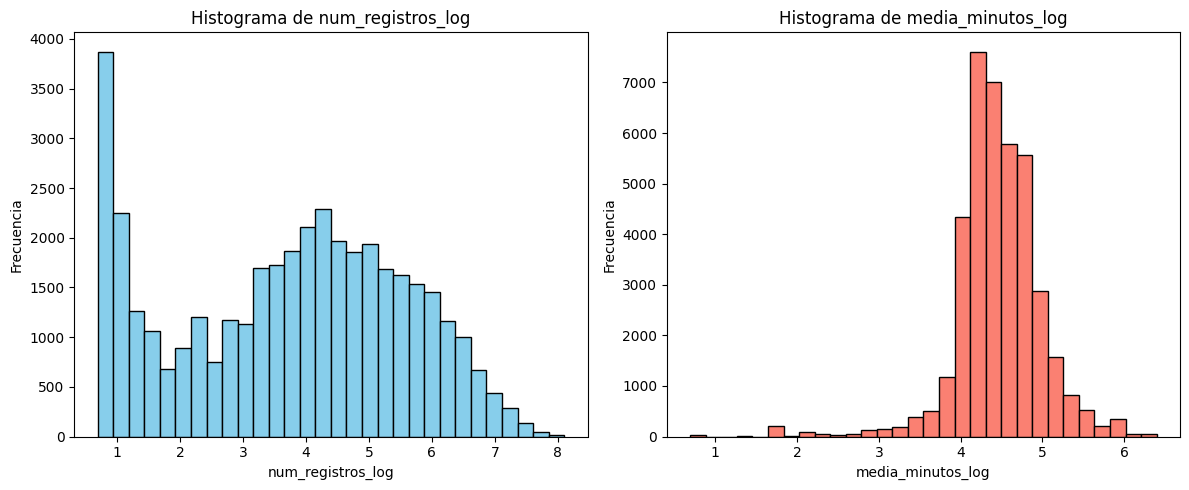

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_parking_info['num_registros_log'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de num_registros_log')
plt.xlabel('num_registros_log')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df_parking_info['media_minutos_log'], bins=30, color='salmon', edgecolor='black')
plt.title('Histograma de media_minutos_log')
plt.xlabel('media_minutos_log')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


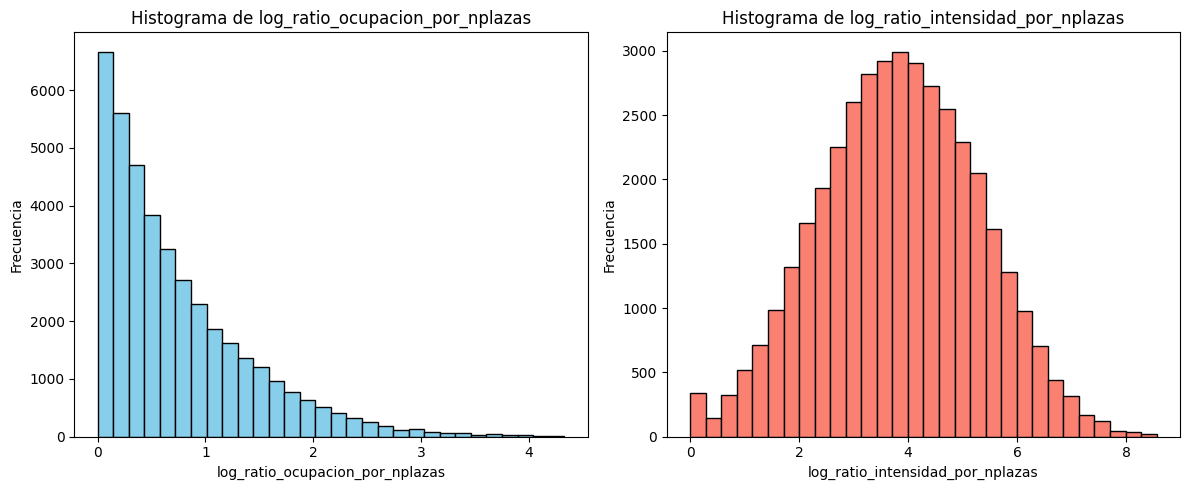

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_parking_info['log_ratio_ocupacion_por_nplazas'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de log_ratio_ocupacion_por_nplazas')
plt.xlabel('log_ratio_ocupacion_por_nplazas')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df_parking_info['log_ratio_intensidad_por_nplazas'], bins=30, color='salmon', edgecolor='black')
plt.title('Histograma de log_ratio_intensidad_por_nplazas')
plt.xlabel('log_ratio_intensidad_por_nplazas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Variables temporales cíclicas
La variable int_tiempo representa un momento del día con 4 categorías (Mañana, Mediodía, Tarde, Noche). Para que el modelo capture la naturaleza cíclica del tiempo (por ejemplo, Noche y Mañana son momentos cercanos), convertimos esta variable en dos variables continuas usando funciones seno y coseno. Esto evita que el modelo interprete int_tiempo como una variable ordinal lineal y captura correctamente la relación circular de los momentos del día.

In [115]:
df_parking_info['tiempo_sin'] = np.sin(2 * np.pi * df_parking_info['int_tiempo'] / 4)
df_parking_info['tiempo_cos'] = np.cos(2 * np.pi * df_parking_info['int_tiempo'] / 4)

df_parking_no_info['tiempo_sin'] = np.sin(2 * np.pi * df_parking_no_info['int_tiempo'] / 4)
df_parking_no_info['tiempo_cos'] = np.cos(2 * np.pi * df_parking_no_info['int_tiempo'] / 4)

## Modelo de regresión

Voy a probar los modelos de Random Forest y XGBoost para el problema de regresión. Éste consiste en estimar el número de veces que se aparca en una determinada plaza de aparcamiento y la duración de la estancia a partir de la información que sí tenemos de los parquímetros.

[Data Preparation for XGBoost](https://https://xgboosting.com/data-preparation-for-xgboost/) , de aquí se saca la preparación de los datos para XGBoost

### XGBoost


In [129]:
# Variables objetivo: usaremos las transformadas con log(1+x) para estabilizar la varianza
y = df_parking_info[['media_minutos_log','num_registros_log']]

# Variables explicativas: quitamos las columnas irrelevantes o derivadas de las variables objetivo
X = df_parking_info.drop([
    'geometria',
    'media_minutos', 'num_registros',
    'media_minutos_log', 'num_registros_log',
    'ratio_ocupacion_por_nplazas', 'ratio_intensidad_por_nplazas',
    'ratio_carga_por_nplazas', 'log_ratio_carga_por_nplazas'
], axis=1)


In [130]:
# Dividimos los datos en datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

In [131]:
# Usamos TimeSeriesSplit para respetar el orden temporal
xgb_model = xgb.XGBRegressor(
    random_state=7,
    eval_metric='rmse',
    objective='reg:squarederror'
)

cv = TimeSeriesSplit(n_splits=3)


In [132]:
# Hacemos fine-tuning mediante búsqueda aleatoria de hiperparámetros para optimizae el modelo
param_dist = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.005, 0.01, 0.02, 0.05],
    'n_estimators': [200, 300, 500],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    random_state=7
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

print('Mejores hiperparámetros:', random_search.best_params_)

Mejores hiperparámetros: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [133]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
print(f"Test MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")

Train MAE: 0.3918, RMSE: 0.5582, R2: 0.6804
Test MAE: 0.4285, RMSE: 0.6124, R2: 0.6247


In [134]:
# Hacemos predicciones sobre el conjunto de datos no informado
df_parking_no_info_xgb = df_parking_no_info.copy()

predictions = best_model.predict(df_parking_no_info_xgb.drop([
                                                              'geometria',
                                                              'ratio_ocupacion_por_nplazas',
                                                              'ratio_intensidad_por_nplazas',
                                                              'ratio_carga_por_nplazas',
                                                              'log_ratio_carga_por_nplazas'
                                                              ], axis = 1))

num_registros = np.expm1(predictions[:, 1])
media_minutos = np.expm1(predictions[:, 0])

df_parking_no_info_xgb['num_registros'] = num_registros
df_parking_no_info_xgb['media_minutos'] = media_minutos

df_parking_no_info_xgb[['num_registros', 'media_minutos']]

,num_registros,media_minutos
0,159.099609,112.603271
1,193.287888,113.288574
2,224.810425,117.269951
3,224.810425,117.269951
4,214.720551,110.133476
...,...,...
228035,2.750679,93.119225
228036,2.434104,96.118378
228037,2.576073,95.594688
228038,2.576073,95.594688


### Random Forest
Decir por qué he elegido estos dos modelos

In [137]:
X = df_parking_info.drop([
    'geometria',
    'media_minutos',
    'num_registros',
    'media_minutos_log',
    'num_registros_log',
    'ratio_ocupacion_por_nplazas',
    'ratio_intensidad_por_nplazas',
    'ratio_carga_por_nplazas',
    'log_ratio_carga_por_nplazas',
], axis=1)

y = df_parking_info[['media_minutos_log', 'num_registros_log']]


In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

In [139]:
# Definimos rangos amplios para que RandomizedSearch explore
param_dist = {
    'n_estimators': randint(100, 500),       # árboles entre 100 y 500
    'max_depth': randint(5, 30),              # profundidad entre 5 y 30
    'min_samples_split': randint(2, 20),      # mínimo muestras para split entre 2 y 20
    'min_samples_leaf': randint(1, 10),       # mínimo muestras en hoja entre 1 y 10
    'max_features': ['auto', 'sqrt', 'log2']  # diferentes opciones para features
}

# Creamos modelo base
rf = RandomForestRegressor(random_state=7, n_jobs=-1)

In [140]:
# Configuramos RandomizedSearch con 50 iteraciones
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                     # número de combinaciones que probará
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=7,
    verbose=1
)

In [141]:
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

print("Mejores parámetros encontrados:", random_search.best_params_)
print("Mejor puntuación CV (MSE negativo):", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# --- 5. Predicciones ---
train_predictions = best_rf.predict(X_train)
test_predictions = best_rf.predict(X_test)

# --- 6. Evaluación ---
mse_train = mean_squared_error(y_train, train_predictions)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)

mse_test = mean_squared_error(y_test, test_predictions)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print("\nRendimiento en TRAIN:")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nRendimiento en TEST:")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R²: {r2_test:.4f}")

In [ ]:
# Make predictions
df_parking_no_info_rf = df_parking_no_info.copy()

predictions = best_rf.predict(df_parking_no_info_rf.drop(['geometria','ratio_ocupacion_por_nplazas', 'ratio_intensidad_por_nplazas','ratio_carga_por_nplazas','log_ratio_carga_por_nplazas'], axis = 1))

# Transform predictions back to original scale
num_registros = np.expm1(predictions[:, 1])
media_minutos = np.expm1(predictions[:, 0])

# Add to original dataframe
df_parking_no_info_rf['num_registros'] = num_registros
df_parking_no_info_rf['media_minutos'] = media_minutos

# Display results
df_parking_no_info_rf[['num_registros', 'media_minutos']]

In [ ]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'XGBoost': [xgb_result.loc['MAE'].values[0],
                xgb_result.loc['MSE'].values[0],
                xgb_result.loc['RMSE'].values[0],
                xgb_result.loc['R2 Score'].values[0]],
    'Random Forest': [rf_result.loc['MAE'].values[0],
                      rf_result.loc['MSE'].values[0],
                      rf_result.loc['RMSE'].values[0],
                      rf_result.loc['R2 Score'].values[0]]
}, index=['MAE', 'MSE', 'RMSE', 'R2 Score'])

print("\nModel Comparison (Test Set):")
print(comparison_df)

## Modelo de clustering

In [ ]:
df_parking_info

In [ ]:
df_parking_info.drop(columns=['num_registros_log', 'media_minutos_log'], inplace=True)

df_parking = pd.concat([df_parking_info, df_parking_no_info])

In [ ]:
df_parking.head()

In [ ]:
df_parking.info()

In [ ]:
from sklearn.ensemble import IsolationForest

# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
df_parking['Outlier_Scores'] = model.fit_predict(df_parking.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
df_parking['Is_Outlier'] = [1 if x == -1 else 0 for x in df_parking['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
df_parking.head()

In [ ]:
# Calculate the percentage of inliers and outliers
outlier_percentage = df_parking['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Separate the outliers for analysis
outliers_data = df_parking[df_parking['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
df_parking_cleaned = df_parking[df_parking['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
df_parking_cleaned = df_parking_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
df_parking_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_parking = df_parking.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# List of columns that don't need to be scaled
columns_to_exclude = ['int_tiempo', 'fin_de_semana', 'color','bateria_linea','geometria']

# List of columns that need to be scaled
columns_to_scale = df_parking.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
df_parking_scaled = df_parking.copy()

# Applying the scaler to the necessary columns in the dataset
df_parking_scaled[columns_to_scale] = scaler.fit_transform(df_parking_scaled[columns_to_scale])

# Display the first few rows of the scaled data
df_parking_scaled.head()

In [ ]:
df_parking_scaled.info()

In [ ]:
df_parking_1_ok.info()

In [ ]:
print("int_tiempo únicos:", df_parking_scaled['int_tiempo'].unique())
print("fin_de_semana únicos:", df_parking_scaled['fin_de_semana'].unique())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

# Configuración de estilos
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

# Mapeo de tiempo a etiquetas legibles
tiempo_labels = {0: "Mañana", 1: "Mediodía", 2: "Tarde", 3: "Noche"}
int_tiempos = list(tiempo_labels.keys())
fin_de_semana_vals = [0, 1]

# Crear figura con subgráficos
fig, axes = plt.subplots(len(int_tiempos), len(fin_de_semana_vals), figsize=(12, 16), sharey=True)

for i, tiempo in enumerate(int_tiempos):
    for j, fin_sem in enumerate(fin_de_semana_vals):
        ax = axes[i, j]
        df_subset = df_parking_scaled[
            (df_parking_scaled['int_tiempo'] == tiempo) &
            (df_parking_scaled['fin_de_semana'] == fin_sem)
        ]

        if not df_subset.empty:
            pca = PCA()
            numeric_data = df_subset.select_dtypes(include=[np.number])
            pca.fit(numeric_data)
            evr = pca.explained_variance_ratio_

            sns.barplot(x=list(range(1, len(evr) + 1)), y=evr, color='#fcb768', ax=ax)
            ax.set_title(f"{tiempo_labels[tiempo]} - Fin de semana: {'Sí' if fin_sem else 'No'}")
            ax.set_xlabel("Componente principal")
            ax.set_ylabel("Varianza explicada")

            for k, val in enumerate(evr):
                ax.text(k, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=8)
        else:
            ax.set_title(f"{tiempo_labels[tiempo]} - Fin de semana: {'Sí' if fin_sem else 'No'}")
            ax.text(0.5, 0.5, 'Sin datos', transform=ax.transAxes, ha='center', va='center', fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])

# Ajustes finales
plt.suptitle("Varianza explicada por PCA en cada franja horaria y tipo de día", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Para subconjunto de datos que tomemos podemos elegir 4 componentes principales. Buscamos automatizar el proceso.

Puedo hacer para cada subconjunto estudiar el clustering individualmente y luego juntarlo todo en un único df.

### Clustering para un día entre semana por la mañana
Estudiamos el subconjunto formado por los registros que corresponden los datos de los días entre semana por la mañana. El estudio para este subconjunto se realiza de manera muy detallada mediante que los demás subconjuntos se estudian de manera más general, aunque con el detalle suficiente para llevar a cabo el modelo de manera efectiva. Subconjunto_aux es el df que se utilizará para entrenar el modelo.

In [ ]:
subconjunto = df_parking_scaled[(df_parking_scaled['int_tiempo'] == 0) & (df_parking_scaled['fin_de_semana'] == 0)]
subconjunto_aux = subconjunto[['media_minutos', 'num_registros', 'numero_plazas','color','bateria_linea','log_ratio_intensidad_por_nplazas','media_ocupacion']]

Para este hacer un estudio del Principal Component Analysis más detallado, para los otros ya no.

In [ ]:
pca = PCA(n_components=4)

df_parking_pca = pca.fit_transform(subconjunto_aux)

# Nombramos la columnas según la componente principal a la que correspondan
df_parking_pca = pd.DataFrame(df_parking_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

Estudiamos tanto el método del codo como el silhouette score para estimar el valor de k antes de llevar a cabo el algoritmo de kmeans final.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X = df_parking_pca.select_dtypes(include=[np.number])

valores_k = range(2, 8)
inercias = []
silhouettes_scores = []

for k in valores_k:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(X)
    inercias.append(kmeans.inertia_)
    silhouettes_scores.append(silhouette_score(X, labels))

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(valores_k, inercias, marker='o', color='darkorange')
axs[0].set_title('Método del codo (Elbow)')
axs[0].set_xlabel('Número de clusters (k)')
axs[0].set_ylabel('Inercia')
axs[0].grid(True)

axs[1].plot(valores_k, silhouettes_scores, marker='s', linestyle='--', color='teal')
axs[1].set_title('Silhouette Score por número de clusters')
axs[1].set_xlabel('Número de clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Podemos observar que tenemos valores relativamente altos del silhouette score para valores altos de inercia, esto nos indica que la distinción entre clusters es buena pero los clusters son amplios, no compactos, y que los puntos tienen alta dispersión. Para datos reales como los que estamos usando en este trabajo un silhouette score de más de 0.45 lo vamos a considerar como aceptable, puesto que los datos reales tienen ruido que complica la segmentación de éstos. En éste caso

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_parking_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Append the new cluster labels back to the original dataset
df_parking_1['cluster'] = kmeans.labels_
# Append the new cluster labels to the PCA version of the dataset
df_parking_pca['cluster'] = kmeans.labels_



In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_parking_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [ ]:
# Plot histograms for each feature segmented by the clusters
features = df_parking_1.columns[1:-1]
clusters = df_parking_1['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df_parking_1[df_parking_1['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()


In [ ]:
stats_por_cluster = df_parking_1.drop('geometria', axis=1).groupby('cluster').mean()

stats_por_cluster

In [ ]:
import geopandas as gpd
from shapely import wkt

# 1. Convertir columna de geometría (WKT -> Point)
# df_parking_1['geometria'] = df_parking_1['geometria'].apply(wkt.loads)

# 2. Crear GeoDataFrame con CRS EPSG:25830
gdf = gpd.GeoDataFrame(df_parking_1, geometry='geometria', crs='EPSG:25830')

# 3. Reproyectar a EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# 4. Extraer latitud y longitud
gdf['latitud'] = gdf.geometry.y
gdf['longitud'] = gdf.geometry.x


In [ ]:
import plotly.express as px

# Convertir cluster a string para usar color_discrete_map
gdf['cluster_str'] = gdf['cluster'].astype(str)

color_discrete_map = {
    "0": "red",
    "1": "green"
}

fig = px.scatter_mapbox(
    gdf,
    lat="latitud",
    lon="longitud",
    color="cluster_str",  # Usar la columna de strings
    zoom=11,
    height=600,
    mapbox_style="carto-positron",
    hover_data={
        "media_ocupacion": True,
        "numero_plazas": True
    },
    color_discrete_map=color_discrete_map
)

# Reducir tamaño de los puntos
fig.update_traces(marker=dict(size=4))

fig.update_layout(title="Clusters de Zonas de Aparcamiento")
fig.show()


In [ ]:
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_mañana_entre_semana.pkl')

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Suponiendo que bank_clust es tu dataframe de entrada
gdf_tree = gdf.copy()

# Asegurar que 'cluster' sea numérico
gdf_tree["cluster"] = gdf_tree["cluster"].astype(int)

# Crear variables dummy estilo one-vs-rest
gdf_tree["cluster_1"] = (gdf_tree["cluster"] == 1).astype(int)
gdf_tree["cluster_2"] = (gdf_tree["cluster"] == 2).astype(int)
gdf_tree["cluster_3"] = (gdf_tree["cluster"] == 3).astype(int)

In [ ]:
gdf_tree

In [ ]:
# Seleccionamos las variables predictoras y la variable objetivo
X = gdf_tree[['media_minutos', 'num_registros', 'numero_plazas','color','bateria_linea','log_ratio_intensidad_por_nplazas','media_ocupacion']] # columnas 0 a 16 (como en R: 1:17)
y = gdf_tree["cluster_1"]

# Entrenamos el árbol
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X, y)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Ajustamos el tamaño de la figura
plt.figure(figsize=(24, 12))

# Dibujamos el árbol con etiquetas y colores
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=["No Cluster 1", "Cluster 1"],
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=True,  # puedes poner True para que las cajas tengan tamaños proporcionales
)

plt.title("VARIABLES ASOCIADAS A CLÚSTER - 1", fontsize=16)
plt.show()


### Clustering para un día entre semana al mediodia

In [ ]:
df_parking_1 = df_parking_scaled[(df_parking_scaled['int_tiempo'] == 1) & (df_parking_scaled['fin_de_semana'] == 0)]
df_parking_1_ok = df_parking_1[['media_minutos', 'num_registros', 'numero_plazas','color','bateria_linea','log_ratio_intensidad_por_nplazas','media_ocupacion']]

In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=4)

# Fitting and transforming the original data to the new PCA dataframe
df_parking_pca = pca.fit_transform(df_parking_1_ok)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
df_parking_pca = pd.DataFrame(df_parking_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_parking_pca.index = df_parking_1.index

📌 1. ¿Qué es la inercia en KMeans?
La inercia mide cuán cerca están los puntos de su centroide asignado. Es la suma de las distancias cuadradas de cada punto al centroide del cluster al que pertenece.

Menor inercia = clusters más compactos (pero no necesariamente mejores).

Siempre disminuye al aumentar k, por eso no se puede usar sola para elegir k.

📌 2. ¿Qué es el Silhouette Score?
El Silhouette Score mide qué tan bien separado está un punto de los clusters vecinos. Su valor va de -1 a 1.

Cerca de 1: los puntos están bien agrupados y separados de otros clusters.

Cerca de 0: los puntos están cerca del límite entre clusters.

Cerca de -1: los puntos están probablemente mal asignados.

🤔 ¿Qué significa tener un valor de k con alta inercia pero buen Silhouette Score?
Eso indica que:

Los clusters están bien separados y definidos (silhouette score alto),

Pero no necesariamente muy compactos (porque la inercia aún es alta).

Esto puede pasar cuando:

Hay pocos clusters, y aún así los puntos están bien agrupados (aunque los clusters sean grandes, poco densos).

O los datos están naturalmente bien separados, incluso con k pequeño.

✅ ¿Qué deberías hacer en ese caso?
Confía más en el Silhouette Score que en la inercia.

La inercia te ayuda a ver la tendencia, pero el Silhouette Score te dice qué tan buena es la partición.

Un k con buena separación (alto silhouette) es preferible aunque la inercia no sea mínima.



In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Solo columnas numéricas
X = df_parking_pca.select_dtypes(include=[np.number])

# Rango de k a probar
k_values = range(2, 8)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Elegir mejor k según silhouette
best_k_silhouette = k_values[np.argmax(silhouettes)]

# --------- Gráfico 1: Elbow (Inercia) ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker='o', color='darkorange')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo (Elbow)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Gráfico 2: Silhouette ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouettes, marker='s', linestyle='--', color='teal')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por número de clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Resultado óptimo ----------
print(f'✅ Mejor k según silhouette score: {best_k_silhouette} (score = {max(silhouettes):.3f})')


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_parking_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Append the new cluster labels back to the original dataset
df_parking_1['cluster'] = kmeans.labels_
# Append the new cluster labels to the PCA version of the dataset
df_parking_pca['cluster'] = kmeans.labels_

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_parking_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [ ]:
stats_por_cluster = df_parking_1.drop('geometria', axis=1).groupby('cluster').mean()

stats_por_cluster

In [ ]:
import plotly.express as px

import geopandas as gpd
from shapely import wkt

# 1. Convertir columna de geometría (WKT -> Point)
df_parking_1['geometria'] = df_parking_1['geometria'].apply(wkt.loads)

# 2. Crear GeoDataFrame con CRS EPSG:25830
gdf = gpd.GeoDataFrame(df_parking_1, geometry='geometria', crs='EPSG:25830')

# 3. Reproyectar a EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# 4. Extraer latitud y longitud
gdf['latitud'] = gdf.geometry.y
gdf['longitud'] = gdf.geometry.x

# Convertir cluster a string para usar color_discrete_map
gdf['cluster_str'] = gdf['cluster'].astype(str)

color_discrete_map = {
    "0": "red",
    "1": "orange",
    "2" : "green"
}

fig = px.scatter_mapbox(
    gdf,
    lat="latitud",
    lon="longitud",
    color="cluster_str",  # Usar la columna de strings
    zoom=11,
    height=600,
    mapbox_style="carto-positron",
    hover_data={
        "media_ocupacion": True,
        "numero_plazas": True
    },
    color_discrete_map=color_discrete_map
)

# Reducir tamaño de los puntos
fig.update_traces(marker=dict(size=4))

fig.update_layout(title="Clusters de Zonas de Aparcamiento")
fig.show()


Podemos observar que debido al tráfico que hay en Madrid Capital un día entresemana al mediodía las plazas verdes se reducen bastante mientras que aumentan las naranjas y las rojas.

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_mañana_entre_semana.pkl')

Clustering de un día entre semana por la tarde

In [ ]:
df_parking_1 = df_parking_scaled[(df_parking_scaled['int_tiempo'] == 2) & (df_parking_scaled['fin_de_semana'] == 0)]
df_parking_1_ok = df_parking_1[['media_minutos', 'num_registros', 'numero_plazas','color','bateria_linea','log_ratio_intensidad_por_nplazas','media_ocupacion']]

In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=4)

# Fitting and transforming the original data to the new PCA dataframe
df_parking_pca = pca.fit_transform(df_parking_1_ok)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
df_parking_pca = pd.DataFrame(df_parking_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_parking_pca.index = df_parking_1.index

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Solo columnas numéricas
X = df_parking_pca.select_dtypes(include=[np.number])

# Rango de k a probar
k_values = range(2, 8)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Elegir mejor k según silhouette
best_k_silhouette = k_values[np.argmax(silhouettes)]

# --------- Gráfico 1: Elbow (Inercia) ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker='o', color='darkorange')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo (Elbow)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Gráfico 2: Silhouette ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouettes, marker='s', linestyle='--', color='teal')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por número de clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Resultado óptimo ----------
print(f'✅ Mejor k según silhouette score: {best_k_silhouette} (score = {max(silhouettes):.3f})')


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_parking_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Append the new cluster labels back to the original dataset
df_parking_1['cluster'] = kmeans.labels_
# Append the new cluster labels to the PCA version of the dataset
df_parking_pca['cluster'] = kmeans.labels_

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_parking_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [ ]:
stats_por_cluster = df_parking_1.drop('geometria', axis=1).groupby('cluster').mean()

stats_por_cluster

In [ ]:
import plotly.express as px

import geopandas as gpd
from shapely import wkt

# 1. Convertir columna de geometría (WKT -> Point)
#df_parking_1['geometria'] = df_parking_1['geometria'].apply(wkt.loads)

# 2. Crear GeoDataFrame con CRS EPSG:25830
gdf = gpd.GeoDataFrame(df_parking_1, geometry='geometria', crs='EPSG:25830')

# 3. Reproyectar a EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# 4. Extraer latitud y longitud
gdf['latitud'] = gdf.geometry.y
gdf['longitud'] = gdf.geometry.x

# Convertir cluster a string para usar color_discrete_map
gdf['cluster_str'] = gdf['cluster'].astype(str)

color_discrete_map = {
    "0": "green",
    "1": "orange",
    "2" : "red"
}

fig = px.scatter_mapbox(
    gdf,
    lat="latitud",
    lon="longitud",
    color="cluster_str",  # Usar la columna de strings
    zoom=11,
    height=600,
    mapbox_style="carto-positron",
    hover_data={
        "media_ocupacion": True,
        "numero_plazas": True
    },
    color_discrete_map=color_discrete_map
)

# Reducir tamaño de los puntos
fig.update_traces(marker=dict(size=4))

fig.update_layout(title="Clusters de Zonas de Aparcamiento")
fig.show()


Vemos que muchas de esas zonas verdes se recuperan por la tarde al disminuir el tráfico.

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_tarde_entre_semana.pkl')

Clustering para un día entre semana por la noche

In [ ]:
df_parking_1 = df_parking_scaled[(df_parking_scaled['int_tiempo'] == 3) & (df_parking_scaled['fin_de_semana'] == 0)]
df_parking_1_ok = df_parking_1[['media_minutos', 'num_registros', 'numero_plazas','color','bateria_linea','log_ratio_intensidad_por_nplazas','media_ocupacion']]

In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=4)

# Fitting and transforming the original data to the new PCA dataframe
df_parking_pca = pca.fit_transform(df_parking_1_ok)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
df_parking_pca = pd.DataFrame(df_parking_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_parking_pca.index = df_parking_1.index

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Solo columnas numéricas
X = df_parking_pca.select_dtypes(include=[np.number])

# Rango de k a probar
k_values = range(2, 8)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Elegir mejor k según silhouette
best_k_silhouette = k_values[np.argmax(silhouettes)]

# --------- Gráfico 1: Elbow (Inercia) ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker='o', color='darkorange')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo (Elbow)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Gráfico 2: Silhouette ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouettes, marker='s', linestyle='--', color='teal')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por número de clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Resultado óptimo ----------
print(f'✅ Mejor k según silhouette score: {best_k_silhouette} (score = {max(silhouettes):.3f})')


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_parking_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Append the new cluster labels back to the original dataset
df_parking_1['cluster'] = kmeans.labels_
# Append the new cluster labels to the PCA version of the dataset
df_parking_pca['cluster'] = kmeans.labels_

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_parking_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [ ]:
stats_por_cluster = df_parking_1.drop('geometria', axis=1).groupby('cluster').mean()

stats_por_cluster

In [ ]:
import plotly.express as px

import geopandas as gpd
from shapely import wkt

# 1. Convertir columna de geometría (WKT -> Point)
#df_parking_1['geometria'] = df_parking_1['geometria'].apply(wkt.loads)

# 2. Crear GeoDataFrame con CRS EPSG:25830
gdf = gpd.GeoDataFrame(df_parking_1, geometry='geometria', crs='EPSG:25830')

# 3. Reproyectar a EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# 4. Extraer latitud y longitud
gdf['latitud'] = gdf.geometry.y
gdf['longitud'] = gdf.geometry.x

# Convertir cluster a string para usar color_discrete_map
gdf['cluster_str'] = gdf['cluster'].astype(str)

color_discrete_map = {
    "0": "green",
    "1": "orange",
    "2" : "red"
}

fig = px.scatter_mapbox(
    gdf,
    lat="latitud",
    lon="longitud",
    color="cluster_str",  # Usar la columna de strings
    zoom=11,
    height=600,
    mapbox_style="carto-positron",
    hover_data={
        "media_ocupacion": True,
        "numero_plazas": True
    },
    color_discrete_map=color_discrete_map
)

# Reducir tamaño de los puntos
fig.update_traces(marker=dict(size=4))

fig.update_layout(title="Clusters de Zonas de Aparcamiento")
fig.show()


Vemos que muchas de esas zonas verdes se recuperan por la tarde al disminuir el tráfico.

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_tarde_entre_semana.pkl')

Fin de semana por la mañana

In [ ]:
df_parking_1 = df_parking_scaled[(df_parking_scaled['int_tiempo'] == 0) & (df_parking_scaled['fin_de_semana'] == 1)]
df_parking_1_ok = df_parking_1[['media_minutos', 'num_registros', 'numero_plazas','color','bateria_linea','log_ratio_intensidad_por_nplazas','media_ocupacion']]

In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=4)

# Fitting and transforming the original data to the new PCA dataframe
df_parking_pca = pca.fit_transform(df_parking_1_ok)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
df_parking_pca = pd.DataFrame(df_parking_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_parking_pca.index = df_parking_1.index

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Solo columnas numéricas
X = df_parking_pca.select_dtypes(include=[np.number])

# Rango de k a probar
k_values = range(2, 8)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Elegir mejor k según silhouette
best_k_silhouette = k_values[np.argmax(silhouettes)]

# --------- Gráfico 1: Elbow (Inercia) ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker='o', color='darkorange')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo (Elbow)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Gráfico 2: Silhouette ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouettes, marker='s', linestyle='--', color='teal')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por número de clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Resultado óptimo ----------
print(f'✅ Mejor k según silhouette score: {best_k_silhouette} (score = {max(silhouettes):.3f})')


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_parking_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Append the new cluster labels back to the original dataset
df_parking_1['cluster'] = kmeans.labels_
# Append the new cluster labels to the PCA version of the dataset
df_parking_pca['cluster'] = kmeans.labels_

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_parking_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [ ]:
stats_por_cluster = df_parking_1.drop('geometria', axis=1).groupby('cluster').mean()

stats_por_cluster

In [ ]:
import plotly.express as px

import geopandas as gpd
from shapely import wkt

# 1. Convertir columna de geometría (WKT -> Point)
#df_parking_1['geometria'] = df_parking_1['geometria'].apply(wkt.loads)

# 2. Crear GeoDataFrame con CRS EPSG:25830
gdf = gpd.GeoDataFrame(df_parking_1, geometry='geometria', crs='EPSG:25830')

# 3. Reproyectar a EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# 4. Extraer latitud y longitud
gdf['latitud'] = gdf.geometry.y
gdf['longitud'] = gdf.geometry.x

# Convertir cluster a string para usar color_discrete_map
gdf['cluster_str'] = gdf['cluster'].astype(str)

color_discrete_map = {
    "0": "green",
    "1": "orange",
    "2" : "red"
}

fig = px.scatter_mapbox(
    gdf,
    lat="latitud",
    lon="longitud",
    color="cluster_str",  # Usar la columna de strings
    zoom=11,
    height=600,
    mapbox_style="carto-positron",
    hover_data={
        "media_ocupacion": True,
        "numero_plazas": True
    },
    color_discrete_map=color_discrete_map
)

# Reducir tamaño de los puntos
fig.update_traces(marker=dict(size=4))

fig.update_layout(title="Clusters de Zonas de Aparcamiento")
fig.show()


Vemos que muchas de esas zonas verdes se recuperan por la tarde al disminuir el tráfico.

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_tarde_entre_semana.pkl')

Estudio clustering fin de semana medio día

In [ ]:
df_parking_1 = df_parking_scaled[(df_parking_scaled['int_tiempo'] == 1) & (df_parking_scaled['fin_de_semana'] == 1)]
df_parking_1_ok = df_parking_1[['media_minutos', 'num_registros', 'numero_plazas','color','bateria_linea','log_ratio_intensidad_por_nplazas','media_ocupacion']]

In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=4)

# Fitting and transforming the original data to the new PCA dataframe
df_parking_pca = pca.fit_transform(df_parking_1_ok)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
df_parking_pca = pd.DataFrame(df_parking_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_parking_pca.index = df_parking_1.index

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Solo columnas numéricas
X = df_parking_pca.select_dtypes(include=[np.number])

# Rango de k a probar
k_values = range(2, 8)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Elegir mejor k según silhouette
best_k_silhouette = k_values[np.argmax(silhouettes)]

# --------- Gráfico 1: Elbow (Inercia) ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker='o', color='darkorange')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo (Elbow)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Gráfico 2: Silhouette ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouettes, marker='s', linestyle='--', color='teal')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por número de clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Resultado óptimo ----------
print(f'✅ Mejor k según silhouette score: {best_k_silhouette} (score = {max(silhouettes):.3f})')


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_parking_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Append the new cluster labels back to the original dataset
df_parking_1['cluster'] = kmeans.labels_
# Append the new cluster labels to the PCA version of the dataset
df_parking_pca['cluster'] = kmeans.labels_

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_parking_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [ ]:
stats_por_cluster = df_parking_1.drop('geometria', axis=1).groupby('cluster').mean()

stats_por_cluster

In [ ]:
import plotly.express as px

import geopandas as gpd
from shapely import wkt

# 1. Convertir columna de geometría (WKT -> Point)
#df_parking_1['geometria'] = df_parking_1['geometria'].apply(wkt.loads)

# 2. Crear GeoDataFrame con CRS EPSG:25830
gdf = gpd.GeoDataFrame(df_parking_1, geometry='geometria', crs='EPSG:25830')

# 3. Reproyectar a EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# 4. Extraer latitud y longitud
gdf['latitud'] = gdf.geometry.y
gdf['longitud'] = gdf.geometry.x

# Convertir cluster a string para usar color_discrete_map
gdf['cluster_str'] = gdf['cluster'].astype(str)

color_discrete_map = {
    "0": "green",
    "1": "orange",
    "2" : "red"
}

fig = px.scatter_mapbox(
    gdf,
    lat="latitud",
    lon="longitud",
    color="cluster_str",  # Usar la columna de strings
    zoom=11,
    height=600,
    mapbox_style="carto-positron",
    hover_data={
        "media_ocupacion": True,
        "numero_plazas": True
    },
    color_discrete_map=color_discrete_map
)

# Reducir tamaño de los puntos
fig.update_traces(marker=dict(size=4))

fig.update_layout(title="Clusters de Zonas de Aparcamiento")
fig.show()


Vemos que muchas de esas zonas verdes se recuperan por la tarde al disminuir el tráfico.

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_tarde_entre_semana.pkl')

Clustering de zonas SER un fin de semana por la tarde

In [ ]:
df_parking_1 = df_parking_scaled[(df_parking_scaled['int_tiempo'] == 2) & (df_parking_scaled['fin_de_semana'] == 1)]
df_parking_1_ok = df_parking_1[['media_minutos', 'num_registros', 'numero_plazas','color','bateria_linea','log_ratio_intensidad_por_nplazas','media_ocupacion']]

In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=4)

# Fitting and transforming the original data to the new PCA dataframe
df_parking_pca = pca.fit_transform(df_parking_1_ok)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
df_parking_pca = pd.DataFrame(df_parking_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_parking_pca.index = df_parking_1.index

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Solo columnas numéricas
X = df_parking_pca.select_dtypes(include=[np.number])

# Rango de k a probar
k_values = range(2, 8)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Elegir mejor k según silhouette
best_k_silhouette = k_values[np.argmax(silhouettes)]

# --------- Gráfico 1: Elbow (Inercia) ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker='o', color='darkorange')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo (Elbow)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Gráfico 2: Silhouette ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouettes, marker='s', linestyle='--', color='teal')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por número de clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Resultado óptimo ----------
print(f'✅ Mejor k según silhouette score: {best_k_silhouette} (score = {max(silhouettes):.3f})')


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_parking_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Append the new cluster labels back to the original dataset
df_parking_1['cluster'] = kmeans.labels_
# Append the new cluster labels to the PCA version of the dataset
df_parking_pca['cluster'] = kmeans.labels_

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_parking_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [ ]:
stats_por_cluster = df_parking_1.drop('geometria', axis=1).groupby('cluster').mean()

stats_por_cluster

In [ ]:
import plotly.express as px

import geopandas as gpd
from shapely import wkt

# 1. Convertir columna de geometría (WKT -> Point)
#df_parking_1['geometria'] = df_parking_1['geometria'].apply(wkt.loads)

# 2. Crear GeoDataFrame con CRS EPSG:25830
gdf = gpd.GeoDataFrame(df_parking_1, geometry='geometria', crs='EPSG:25830')

# 3. Reproyectar a EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# 4. Extraer latitud y longitud
gdf['latitud'] = gdf.geometry.y
gdf['longitud'] = gdf.geometry.x

# Convertir cluster a string para usar color_discrete_map
gdf['cluster_str'] = gdf['cluster'].astype(str)

color_discrete_map = {
    "0": "green",
    "1": "orange",
    "2" : "red"
}

fig = px.scatter_mapbox(
    gdf,
    lat="latitud",
    lon="longitud",
    color="cluster_str",  # Usar la columna de strings
    zoom=11,
    height=600,
    mapbox_style="carto-positron",
    hover_data={
        "media_ocupacion": True,
        "numero_plazas": True
    },
    color_discrete_map=color_discrete_map
)

# Reducir tamaño de los puntos
fig.update_traces(marker=dict(size=4))

fig.update_layout(title="Clusters de Zonas de Aparcamiento")
fig.show()


Vemos que muchas de esas zonas verdes se recuperan por la tarde al disminuir el tráfico.

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_tarde_entre_semana.pkl')

Clustering de zonas SER de un fin de semana por la noche

In [ ]:
df_parking_1 = df_parking_scaled[(df_parking_scaled['int_tiempo'] == 3) & (df_parking_scaled['fin_de_semana'] == 1)]
df_parking_1_ok = df_parking_1[['media_minutos', 'num_registros', 'numero_plazas','color','bateria_linea','log_ratio_intensidad_por_nplazas','media_ocupacion']]

In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=4)

# Fitting and transforming the original data to the new PCA dataframe
df_parking_pca = pca.fit_transform(df_parking_1_ok)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
df_parking_pca = pd.DataFrame(df_parking_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_parking_pca.index = df_parking_1.index

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Solo columnas numéricas
X = df_parking_pca.select_dtypes(include=[np.number])

# Rango de k a probar
k_values = range(2, 8)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Elegir mejor k según silhouette
best_k_silhouette = k_values[np.argmax(silhouettes)]

# --------- Gráfico 1: Elbow (Inercia) ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker='o', color='darkorange')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo (Elbow)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Gráfico 2: Silhouette ----------
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouettes, marker='s', linestyle='--', color='teal')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por número de clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Resultado óptimo ----------
print(f'✅ Mejor k según silhouette score: {best_k_silhouette} (score = {max(silhouettes):.3f})')


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_parking_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Append the new cluster labels back to the original dataset
df_parking_1['cluster'] = kmeans.labels_
# Append the new cluster labels to the PCA version of the dataset
df_parking_pca['cluster'] = kmeans.labels_

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_parking_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [ ]:
stats_por_cluster = df_parking_1.drop('geometria', axis=1).groupby('cluster').mean()

stats_por_cluster

In [ ]:
import plotly.express as px

import geopandas as gpd
from shapely import wkt

# 1. Convertir columna de geometría (WKT -> Point)
#df_parking_1['geometria'] = df_parking_1['geometria'].apply(wkt.loads)

# 2. Crear GeoDataFrame con CRS EPSG:25830
gdf = gpd.GeoDataFrame(df_parking_1, geometry='geometria', crs='EPSG:25830')

# 3. Reproyectar a EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# 4. Extraer latitud y longitud
gdf['latitud'] = gdf.geometry.y
gdf['longitud'] = gdf.geometry.x

# Convertir cluster a string para usar color_discrete_map
gdf['cluster_str'] = gdf['cluster'].astype(str)

color_discrete_map = {
    "0": "green",
    "1": "orange",
    "2" : "red"
}

fig = px.scatter_mapbox(
    gdf,
    lat="latitud",
    lon="longitud",
    color="cluster_str",  # Usar la columna de strings
    zoom=11,
    height=600,
    mapbox_style="carto-positron",
    hover_data={
        "media_ocupacion": True,
        "numero_plazas": True
    },
    color_discrete_map=color_discrete_map
)

# Reducir tamaño de los puntos
fig.update_traces(marker=dict(size=4))

fig.update_layout(title="Clusters de Zonas de Aparcamiento")
fig.show()


Vemos que muchas de esas zonas verdes se recuperan por la tarde al disminuir el tráfico.

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_tarde_entre_semana.pkl')

In [ ]:
df_resumen

In [ ]:
df_resumen

Aquí ya leemos el tráfico a tiempo real y montamos el sistema de recomendación utilizando los clusters y el tráfico a tiempo real

In [ ]:
url = "https://informo.madrid.es/informo/tmadrid/pm.xml"

In [ ]:
import requests
import xml.etree.ElementTree as ET

response = requests.get(url)

if response.status_code != 200:
    raise Exception(f"Error al acceder a la URL: {response.status_code}")

# Parsear XML
root = ET.fromstring(response.content)

# Crear lista para guardar los datos
data = []

# Recorremos nodos XML (esto depende de la estructura exacta del XML)
for item in root.findall(".//pm"):  # Ajusta la etiqueta a tus datos
    data.append({
        "descripcion": item.findtext("descripcion"),
        "carga": item.findtext("carga"),
        "intensidad": item.findtext("intensidad"),
        "ocupacion": item.findtext("ocupacion"),
        "nivelServicio": item.findtext("nivelServicio"),
        "st_x": item.findtext("st_x"),
        "st_y": item.findtext("st_y")
    })

data = pd.DataFrame(data)
data = data.dropna()  # Quitar valores nulos si los hay
data[['intensidad', 'ocupacion', 'carga']] = data[['intensidad', 'ocupacion', 'carga']].astype(float)


In [ ]:
from pyproj import Transformer

# Define el sistema de coordenadas origen y destino
transformer = Transformer.from_crs("epsg:32630", "epsg:4326", always_xy=True)
# Reemplaza coma por punto y convierte a float
data['st_x'] = data['st_x'].str.replace(',', '.').astype(float)
data['st_y'] = data['st_y'].str.replace(',', '.').astype(float)

lon, lat = transformer.transform(data['st_x'], data['st_y'])
data["longitud"] = lon
data["latitud"] = lat
print(f"Longitud: {lon}, Latitud: {lat}")

In [ ]:
import random

min_lat, max_lat = 40.410, 40.440
min_lon, max_lon = -3.725, -3.670

random_lat = random.uniform(min_lat, max_lat)
random_lon = random.uniform(min_lon, max_lon)

print(f"Random location: {random_lat}, {random_lon}")

In [ ]:
df_parking_pca

In [ ]:
import plotly.express as px

import geopandas as gpd
from shapely import wkt

# 1. Convertir columna de geometría (WKT -> Point)
# df_parking_1['geometria'] = df_parking_1['geometria'].apply(wkt.loads)

# 2. Crear GeoDataFrame con CRS EPSG:25830
gdf = gpd.GeoDataFrame(df_parking_1, geometry='geometria', crs='EPSG:25830')

# 3. Reproyectar a EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# 4. Extraer latitud y longitud
gdf['latitud'] = gdf.geometry.y
gdf['longitud'] = gdf.geometry.x

# Convertir cluster a string para usar color_discrete_map
gdf['cluster_str'] = gdf['cluster'].astype(str)

color_discrete_map = {
    "0": "green",
    "1": "orange",
    "2" : "red"
}

fig = px.scatter_mapbox(
    gdf,
    lat="latitud",
    lon="longitud",
    color="cluster_str",  # Usar la columna de strings
    zoom=11,
    height=600,
    mapbox_style="carto-positron",
    hover_data={
        "media_ocupacion": True,
        "numero_plazas": True
    },
    color_discrete_map=color_discrete_map
)

# Reducir tamaño de los puntos
fig.update_traces(marker=dict(size=4))

fig.update_layout(title="Clusters de Zonas de Aparcamiento")
fig.show()



In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import random

fig.add_trace(go.Scattermapbox(
    lat=[random_lat],
    lon=[random_lon],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=14,
        color='black'
    ),
    name="Random Location"
))
fig.show()


In [ ]:
import numpy as np

def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)

    a = np.sin(d_phi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(d_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    return R * c


cluster_df['distance_to_location'] = haversine_np(
    cluster_df['latitud'], cluster_df['longitud'], random_lat, random_lon
)

data['distance_to_location'] = haversine_np(
    data['latitud'], cluster_df['longitud'], random_lat, random_lon
)

radius_km = 1.0
nearby_df = cluster_df[cluster_df['distance_to_location'] <= radius_km]
nearby_2_df = data[data['distance_to_location'] <= radius_km]